# Temporal and Regional Entrepreneurship Analysis

This notebook analyzes entrepreneurial activity across time (2015-2021) and regions in the United States, with a focus on comparing new and established entrepreneurs across different industries.

## Key Questions Addressed:
1. How has entrepreneurial activity (both new and established) changed over time?
2. What regional patterns exist in entrepreneurship rates?
3. How do industry preferences differ across regions?
4. What impact did COVID-19 have on entrepreneurial activity across industries and regions?
5. What is the relationship between new and established entrepreneurship by region and industry?

## Data Import and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# Load the GEM dataset
gem_data = pd.read_csv("../data/Hackathon_GEM_Data_FULL.csv")

# Display dataset info
print(f"Dataset shape: {gem_data.shape}")
gem_data.head()

Dataset shape: (15868, 36)


,weight,new_entrepreneur,established_entrepreneur,knows_entrepreneur,local_opportunity,entrepreneurial_skill,fear_of_failure,wants_entrepreneurship,respects_entrepreneurship,follows_entrepreneurship,...,new_entrepreneur_owners,new_entrepreneur_external_sales,established_entrepreneur_external_sales,new_entrepreneur_innovation,year,new_entrepreneur_local_innovation,new_entrepreneur_employees,established_entrepreneur_employees,race,region
0,0.674020,No,No,No,No,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
1,0.674020,No,No,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
2,0.814409,No,Yes,No,No,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,1.0,White,Great Lakes
3,1.289586,No,No,No,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Great Lakes
4,0.963587,No,No,No,NaN,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Southeast


## Data Preparation

Let's prepare the data for our specific analysis needs.

In [2]:
# Check for missing values in key variables
key_vars = ['year', 'region', 'new_entrepreneur', 'established_entrepreneur', 
            'new_entrepreneur_industry', 'established_entrepreneur_industry', 'weight']

# Display missing value counts
gem_data[key_vars].isnull().sum()

year                                     0
region                                   0
new_entrepreneur                         0
established_entrepreneur                 0
new_entrepreneur_industry             9989
established_entrepreneur_industry    10554
weight                                   0
dtype: int64

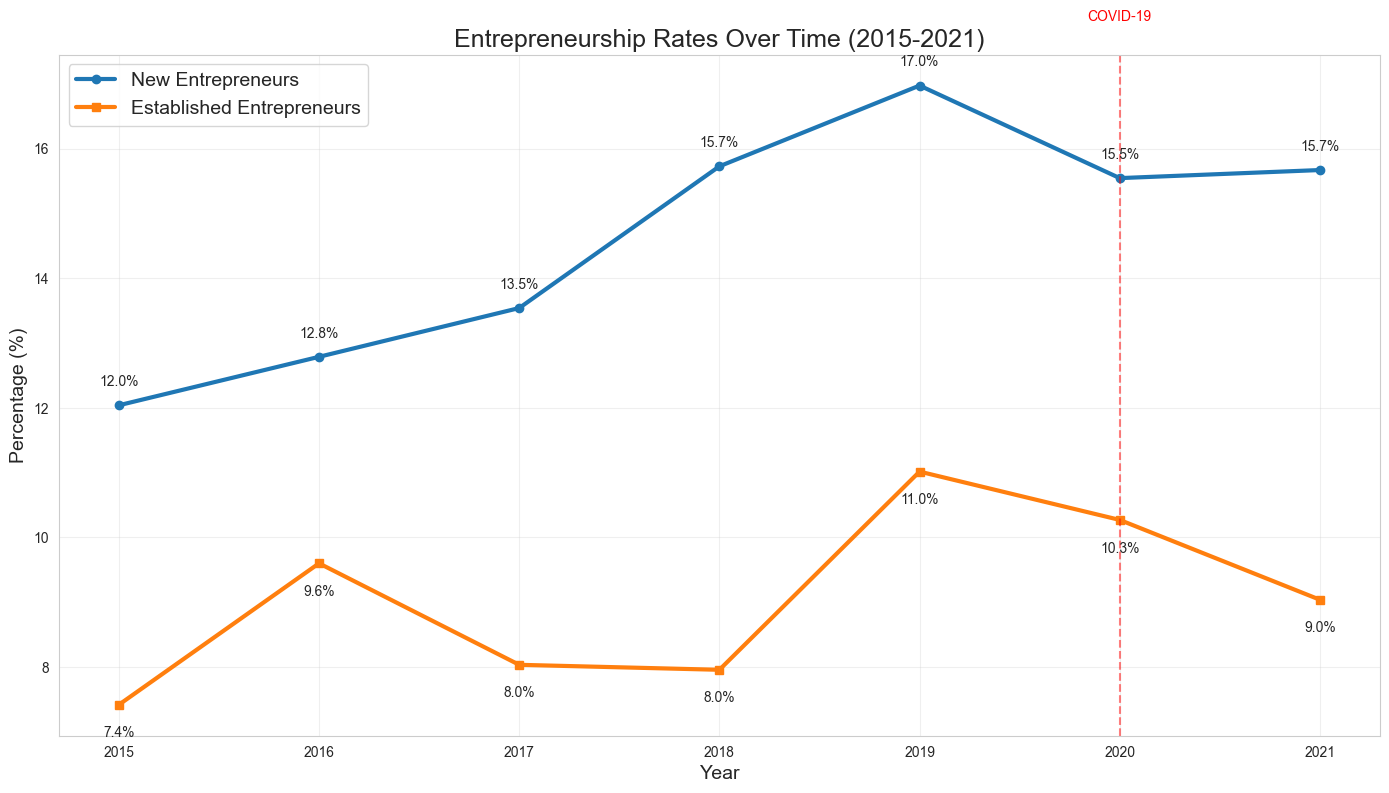

In [6]:
# Visualize time trends
plt.figure(figsize=(14, 8))

# Convert year to string to ensure proper categorical plotting
year_labels = [str(year) for year in yearly_rates['year']]
x_positions = np.arange(len(year_labels))

# Plot trends
plt.plot(x_positions, yearly_rates['new_entrepreneur_rate'], 
         marker='o', linewidth=3, label='New Entrepreneurs')
plt.plot(x_positions, yearly_rates['established_entrepreneur_rate'], 
         marker='s', linewidth=3, label='Established Entrepreneurs')

# Customize plot
plt.title('Entrepreneurship Rates Over Time (2015-2021)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)

# Set x-ticks and labels
plt.xticks(x_positions, year_labels)

# Add value labels
for i, row in yearly_rates.iterrows():
    plt.text(i, row['new_entrepreneur_rate'] + 0.3, 
             f"{row['new_entrepreneur_rate']:.1f}%", ha='center')
    plt.text(i, row['established_entrepreneur_rate'] - 0.5, 
             f"{row['established_entrepreneur_rate']:.1f}%", ha='center')

# Add vertical line at 2020 (COVID-19)
# Find the position of 2020 in the x_positions
covid_index = year_labels.index('2020')
plt.axvline(x=covid_index, color='red', linestyle='--', alpha=0.5, label='COVID-19 Pandemic')

# Get the y-limit for proper text placement
y_max = max(yearly_rates['new_entrepreneur_rate'].max(), yearly_rates['established_entrepreneur_rate'].max())
plt.text(covid_index, y_max + 1, 'COVID-19', color='red', ha='center')

plt.tight_layout()
plt.show()

## 1. Time Trends in Entrepreneurial Activity

In [7]:
# Calculate yearly entrepreneurship rates
yearly_rates = gem_data.groupby('year').apply(lambda x: pd.Series({
    'new_entrepreneur_rate': (x['new_entrepreneur'] == 'Yes').mean() * 100,
    'established_entrepreneur_rate': (x['established_entrepreneur'] == 'Yes').mean() * 100,
    'sample_size': len(x),
    'weighted_count': x['weight'].sum()
})).reset_index()

# Display yearly rates
yearly_rates

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3359752247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_rates = gem_data.groupby('year').apply(lambda x: pd.Series({
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3359752247.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_rates = gem_data.groupby('year').apply(lambda x: pd.Series({


,year,new_entrepreneur_rate,established_entrepreneur_rate,sample_size,weighted_count
0,2015,12.038763,7.417070,2683.0,2683.0
1,2016,12.786630,9.599689,2573.0,2573.0
2,2017,13.539326,8.033708,1780.0,1780.0
3,2018,15.726560,7.956668,2677.0,2677.0
4,2019,16.972649,11.015362,2669.0,2669.0
5,2020,15.544332,10.269360,1782.0,1782.0
6,2021,15.669014,9.037559,1704.0,1704.0


## 2. Regional Patterns in Entrepreneurship

In [9]:
# Calculate regional entrepreneurship rates
regional_rates = gem_data.groupby('region').apply(lambda x: pd.Series({
    'new_entrepreneur_rate': (x['new_entrepreneur'] == 'Yes').mean() * 100,
    'established_entrepreneur_rate': (x['established_entrepreneur'] == 'Yes').mean() * 100,
    'sample_size': len(x),
    'weighted_count': x['weight'].sum()
})).reset_index()

# Sort by new entrepreneur rate
regional_rates = regional_rates.sort_values('new_entrepreneur_rate', ascending=False)

# Display regional rates
regional_rates

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/171543573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_rates = gem_data.groupby('region').apply(lambda x: pd.Series({
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/171543573.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_rates = gem_data.groupby('region').apply(lambda x: pd.Series({


,region,new_entrepreneur_rate,established_entrepreneur_rate,sample_size,weighted_count
8,South,16.507297,8.756920,1987.0,1938.781220
3,Mountain and Plains,16.183986,13.287905,587.0,558.531298
4,New England,15.426252,8.660352,739.0,755.728332
7,Pacific Southwest,15.415020,8.476065,2277.0,2470.247438
9,Southeast,14.823374,8.319577,3029.0,3111.455199
6,Pacific Northwest,14.634146,10.473458,697.0,674.331994
0,Central Midwest,14.484680,11.420613,718.0,685.798787
5,New York-New Jersey,13.851351,7.162162,1480.0,1465.245683
2,Mid-Atlantic,13.125000,9.812500,1600.0,1570.662318
1,Great Lakes,12.817720,9.222948,2754.0,2637.217730


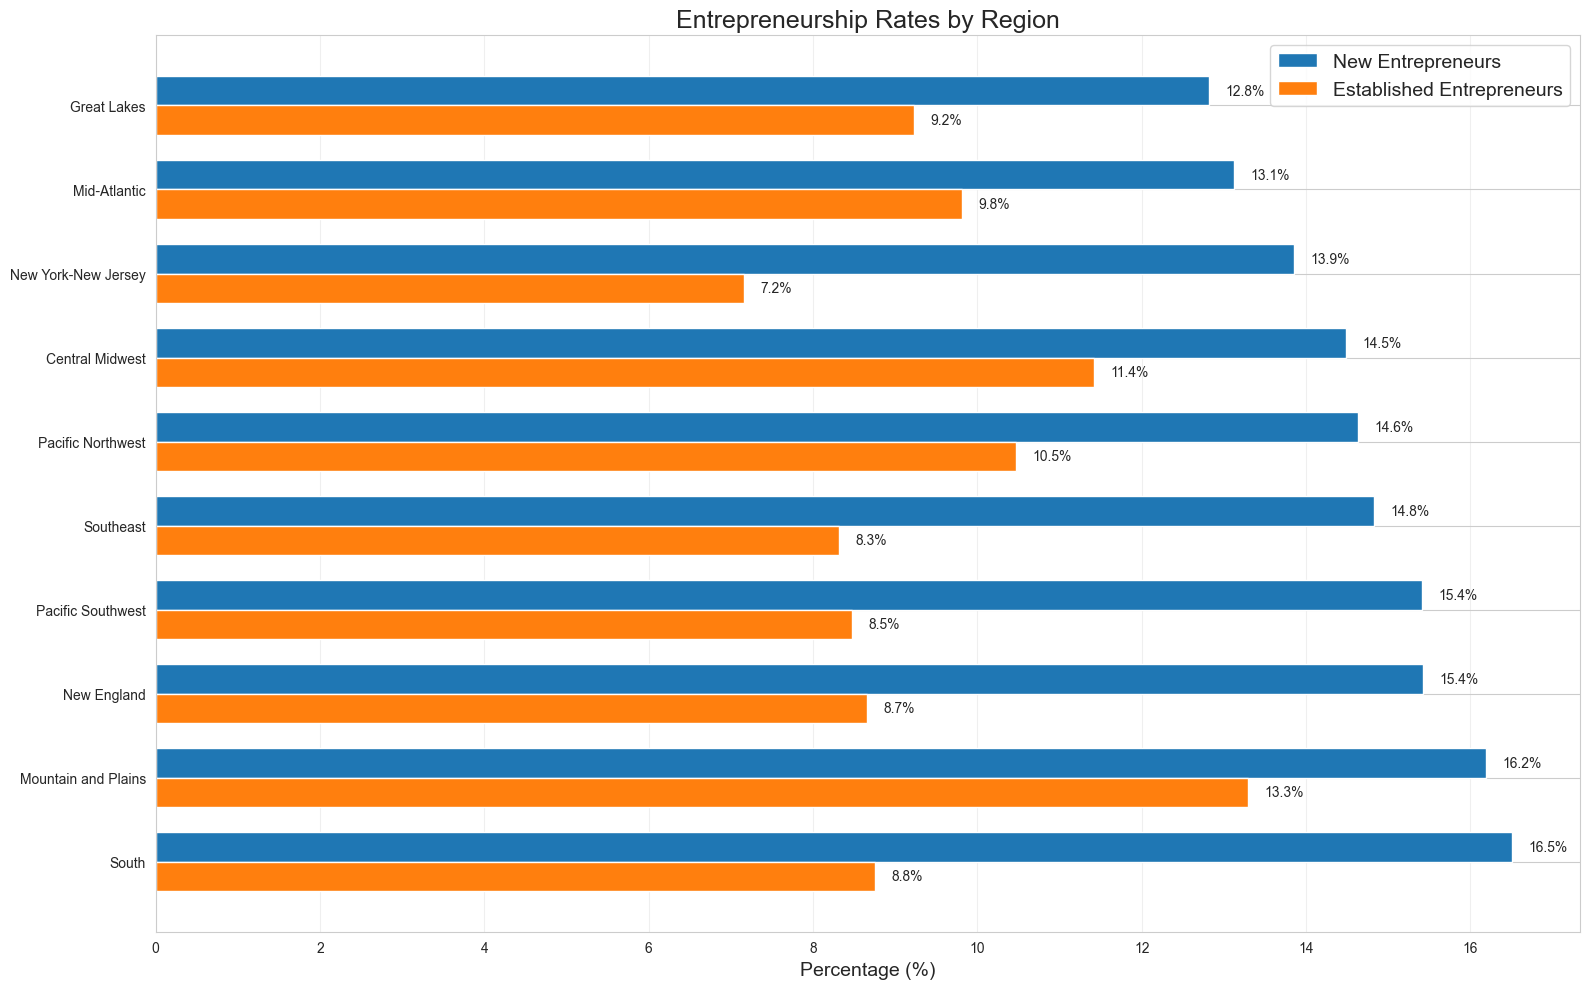

In [10]:
# Visualize regional rates
plt.figure(figsize=(16, 10))

# Create a horizontal bar chart
x = np.arange(len(regional_rates))
width = 0.35

# Create bars
plt.barh(x + width/2, regional_rates['new_entrepreneur_rate'], width, label='New Entrepreneurs')
plt.barh(x - width/2, regional_rates['established_entrepreneur_rate'], width, label='Established Entrepreneurs')

# Customize plot
plt.title('Entrepreneurship Rates by Region', fontsize=18)
plt.xlabel('Percentage (%)', fontsize=14)
plt.yticks(x, regional_rates['region'])
plt.grid(True, axis='x', alpha=0.3)
plt.legend(fontsize=14)

# Add value labels
for i, v in enumerate(regional_rates['new_entrepreneur_rate']):
    plt.text(v + 0.2, i + width/2, f"{v:.1f}%", va='center')
for i, v in enumerate(regional_rates['established_entrepreneur_rate']):
    plt.text(v + 0.2, i - width/2, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()

## 3. Time and Regional Analysis Combined

In [11]:
# Calculate entrepreneurship rates by year and region
year_region_rates = gem_data.groupby(['year', 'region']).apply(lambda x: pd.Series({
    'new_entrepreneur_rate': (x['new_entrepreneur'] == 'Yes').mean() * 100,
    'established_entrepreneur_rate': (x['established_entrepreneur'] == 'Yes').mean() * 100,
    'sample_size': len(x),
    'weighted_count': x['weight'].sum()
})).reset_index()

# Display a sample of the combined data
year_region_rates.head(10)

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/2543273.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_region_rates = gem_data.groupby(['year', 'region']).apply(lambda x: pd.Series({
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/2543273.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year_region_rates = gem_data.groupby(['year', 'region']).apply(lambda x: pd.Series({


,year,region,new_entrepreneur_rate,established_entrepreneur_rate,sample_size,weighted_count
0,2015,Central Midwest,8.695652,8.695652,115.0,116.778826
1,2015,Great Lakes,11.184211,8.552632,456.0,447.611194
2,2015,Mid-Atlantic,11.382114,6.504065,246.0,262.021042
3,2015,Mountain and Plains,20.000000,10.526316,95.0,93.791075
4,2015,New England,12.173913,8.695652,115.0,127.580401
5,2015,New York-New Jersey,10.788382,4.149378,241.0,248.394303
6,2015,Pacific Northwest,10.256410,10.256410,117.0,112.715182
7,2015,Pacific Southwest,12.359551,6.516854,445.0,416.698361
8,2015,South,11.845730,6.336088,363.0,330.276744
9,2015,Southeast,13.265306,8.163265,490.0,527.132871


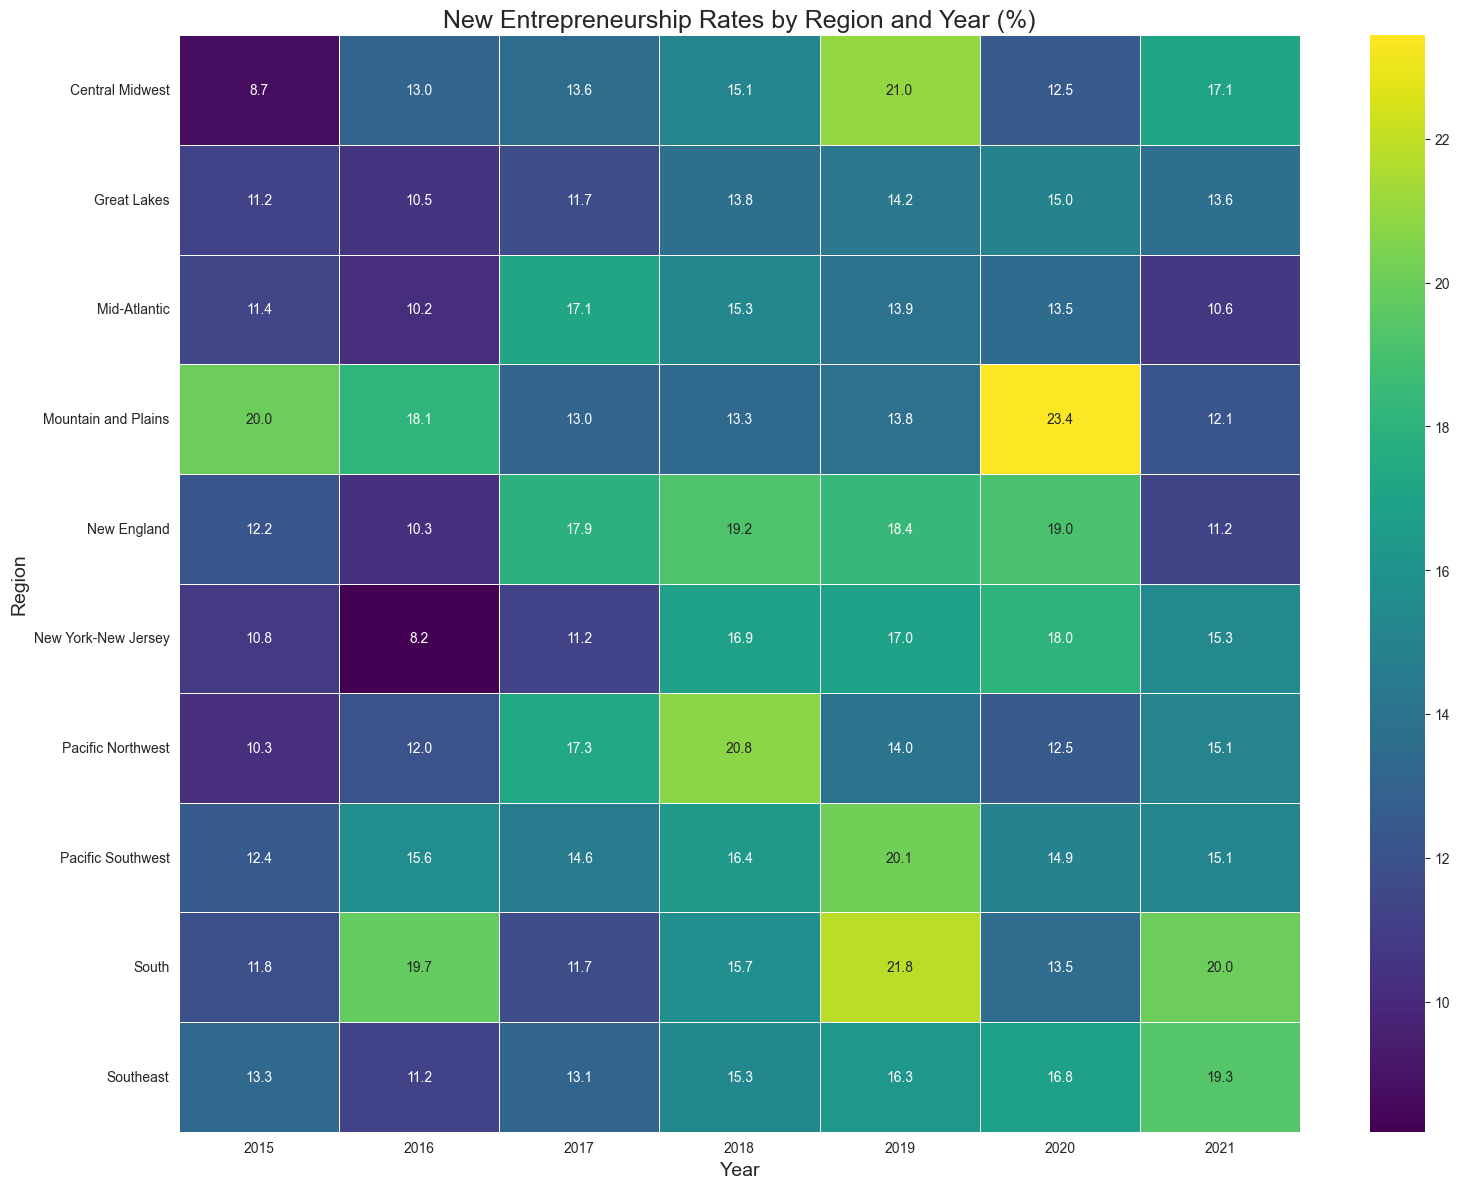

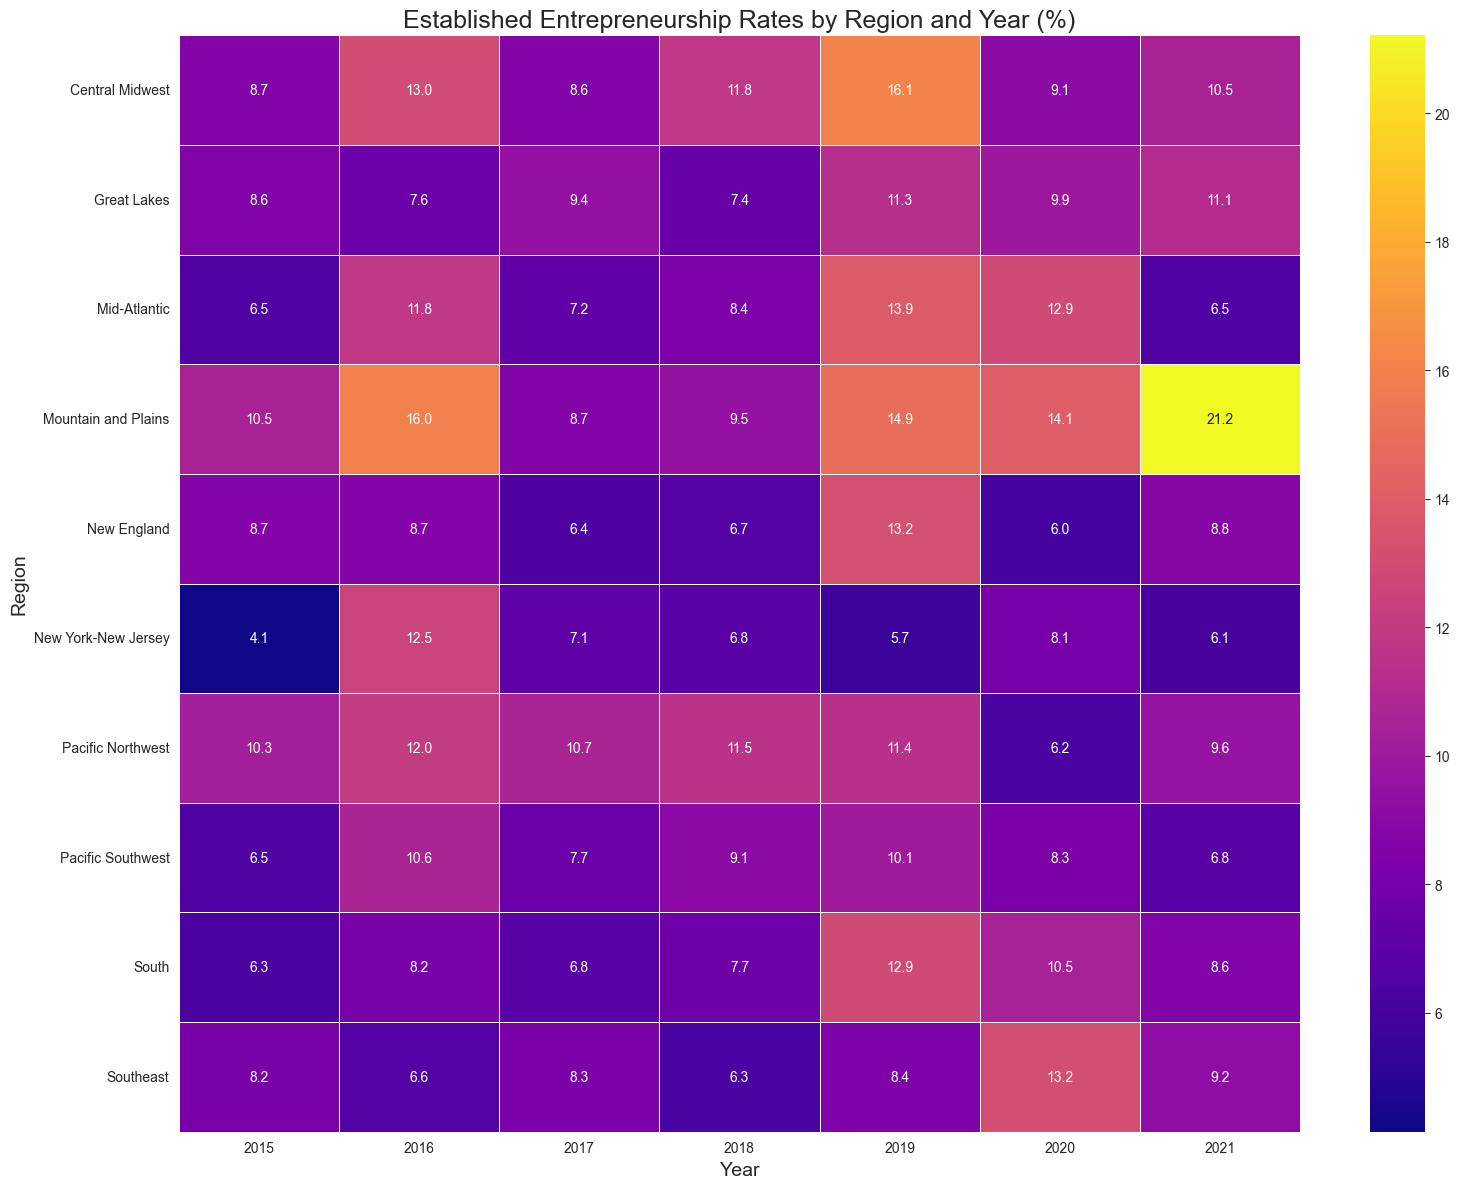

In [12]:
# Create a heatmap of new entrepreneurship rates by year and region
# Pivot the data for the heatmap
heatmap_data = year_region_rates.pivot(index='region', columns='year', values='new_entrepreneur_rate')

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('New Entrepreneurship Rates by Region and Year (%)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show()

# Repeat for established entrepreneurs
heatmap_data_est = year_region_rates.pivot(index='region', columns='year', values='established_entrepreneur_rate')

plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data_est, annot=True, cmap='plasma', fmt='.1f', linewidths=.5)
plt.title('Established Entrepreneurship Rates by Region and Year (%)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show()

## 4. Industry Analysis by Year and Region

In [13]:
# Filter to entrepreneurs with valid industry data
new_entrepreneurs = gem_data[gem_data['new_entrepreneur'] == 'Yes'].dropna(subset=['new_entrepreneur_industry'])
established_entrepreneurs = gem_data[gem_data['established_entrepreneur'] == 'Yes'].dropna(subset=['established_entrepreneur_industry'])

# Calculate industry distribution over time for new entrepreneurs
industry_by_year_new = pd.crosstab(
    index=new_entrepreneurs['year'],
    columns=new_entrepreneurs['new_entrepreneur_industry'],
    values=new_entrepreneurs['weight'],
    aggfunc='sum',
    normalize='index'
) * 100

# Display industry distribution over time
industry_by_year_new

new_entrepreneur_industry,ADMINISTRATIVE SERVICES,"AGRICULTURE,FORESTRY,FISHING","FINANCIAL INTERMEDIATION, REAL ESTATE","GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",INFORMATION AND COMMUNICATION,MANUFACTURING,"MINING,CONSTRUCTION",NOT CLASSIFIED/MISSING,PERSONAL/CONSUMER SERVICE ACTIVITIES,PROFESSIONAL SERVICES,"RETAIL TRADE, HOTELS & RESTAURANTS","UTILISATION, TRANSPORT, STORAGE",WHOLESALE TRADE
year,,,,,,,,,,,,,
2015,5.121355,3.004980,6.661390,19.747700,6.090965,5.617240,7.760701,0.000000,4.313159,14.912608,19.475438,2.761671,4.532794
2016,6.465235,3.843228,7.614361,16.321014,8.069876,6.068225,7.191696,0.000000,5.940629,11.471455,17.994087,4.942786,4.077408
2017,5.592594,4.759292,9.329488,17.819014,8.972600,6.527217,5.853757,0.000000,4.338561,12.271307,17.828965,3.470260,3.236945
2018,5.426049,4.828275,8.598816,14.175504,6.709433,8.050836,4.392728,0.000000,6.187025,12.712689,23.554905,3.142878,2.220862
2019,3.812679,3.289423,10.368559,14.511627,5.088048,9.873947,6.322391,5.751374,2.474179,10.856623,20.744563,4.502013,2.404574
2020,5.274735,2.796597,12.106083,17.229838,4.624850,7.510300,7.350412,0.000000,4.338342,12.257185,20.640952,4.159329,1.711377
2021,8.124310,3.125480,10.132017,13.981644,3.951859,6.761290,3.893083,11.665000,4.733260,6.584363,20.037652,4.019918,2.990123


In [14]:
# Calculate industry distribution over time for established entrepreneurs
industry_by_year_est = pd.crosstab(
    index=established_entrepreneurs['year'],
    columns=established_entrepreneurs['established_entrepreneur_industry'],
    values=established_entrepreneurs['weight'],
    aggfunc='sum',
    normalize='index'
) * 100

# Display industry distribution over time
industry_by_year_est

established_entrepreneur_industry,ADMINISTRATIVE SERVICES,"AGRICULTURE,FORESTRY,FISHING","FINANCIAL INTERMEDIATION, REAL ESTATE","GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",INFORMATION AND COMMUNICATION,MANUFACTURING,"MINING,CONSTRUCTION",NOT CLASSIFIED/MISSING,PERSONAL/CONSUMER SERVICE ACTIVITIES,PROFESSIONAL SERVICES,"RETAIL TRADE, HOTELS & RESTAURANTS","UTILISATION, TRANSPORT, STORAGE",WHOLESALE TRADE
year,,,,,,,,,,,,,
2015,7.025964,6.316366,9.993183,21.150007,2.931471,3.471093,14.239350,0.000000,1.572132,19.799118,9.129006,1.352217,3.020092
2016,5.781321,4.678946,7.273488,13.390012,4.279270,8.094539,14.506518,0.000000,3.698529,17.750025,13.690866,3.696066,3.160420
2017,4.443603,3.892825,10.405523,12.633913,9.550903,4.604422,21.910103,0.000000,0.637296,14.494704,11.154441,1.875158,4.397108
2018,5.370710,8.009457,11.139212,15.719760,5.786426,4.265658,14.551767,0.000000,5.509238,12.759036,12.173112,2.694232,2.021389
2019,5.161357,7.851764,12.722039,14.667390,5.154916,4.570250,11.007612,3.506762,5.324588,12.628780,11.110205,2.916018,3.378320
2020,8.791449,4.359570,7.362330,12.288061,6.356414,5.251651,14.240958,0.000000,2.667194,17.037503,10.342876,4.977719,6.324275
2021,2.959900,7.248300,11.719573,18.637045,4.777117,5.772450,8.859739,6.359244,4.917131,13.942659,7.403442,6.126443,1.276956


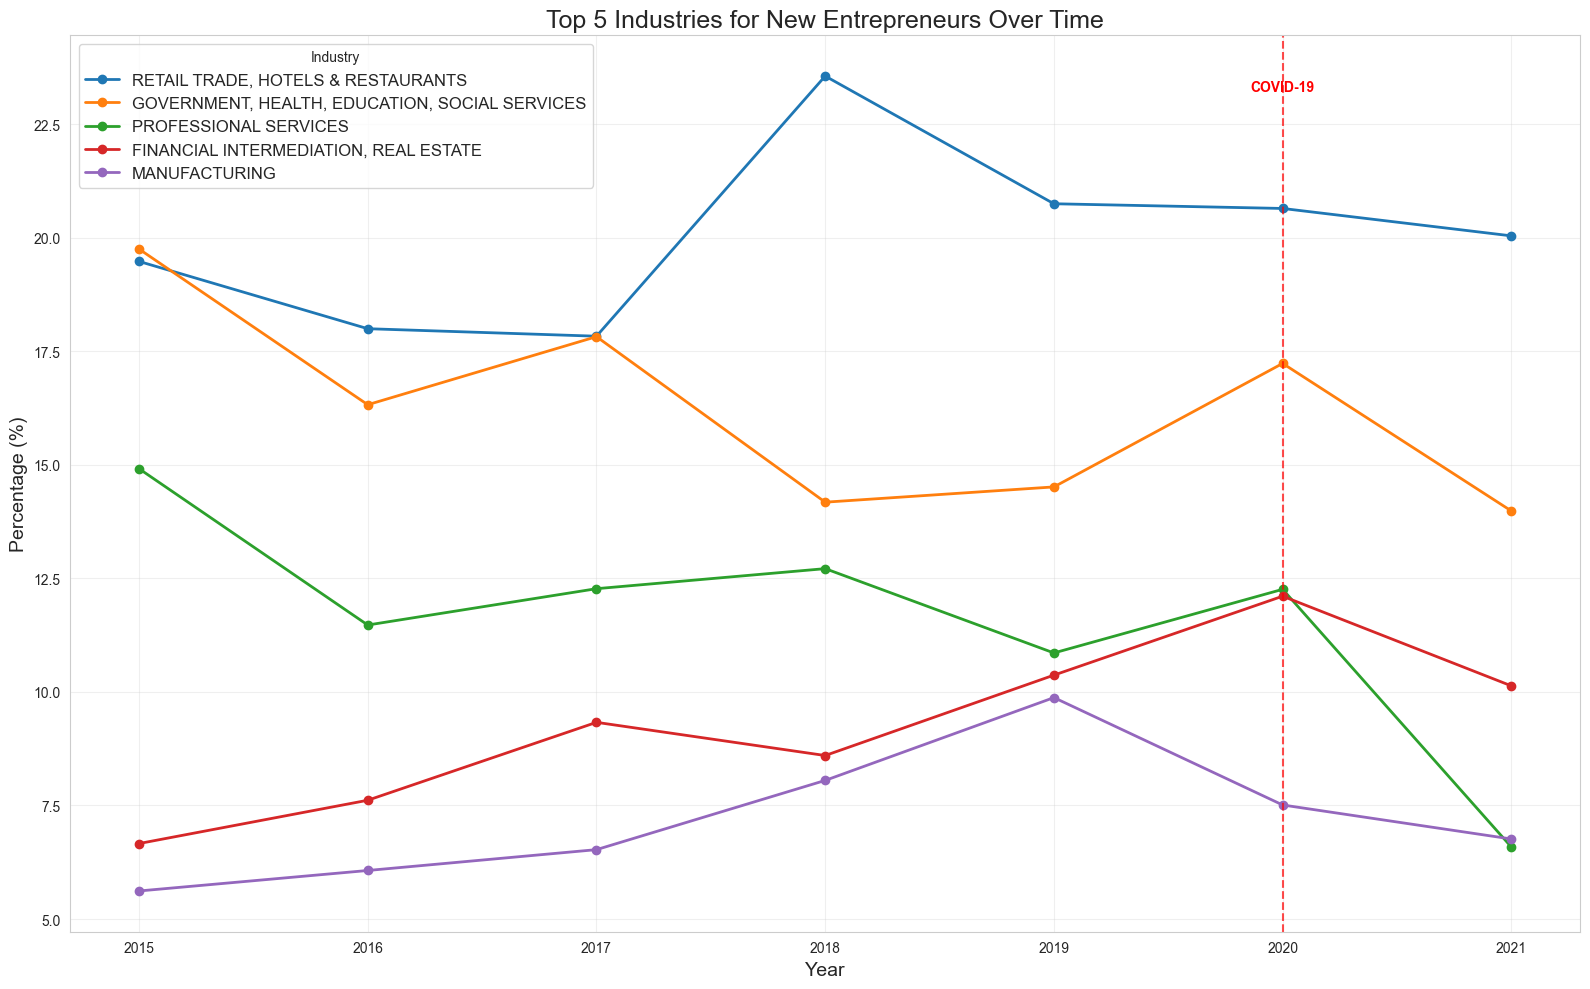

In [16]:
# Choose top 5 industries for visualization
top_industries = industry_by_year_new.mean().sort_values(ascending=False).head(5).index.tolist()

# Create a line plot of top industries over time for new entrepreneurs
plt.figure(figsize=(16, 10))

# Convert year column to strings for proper x-axis display
years = industry_by_year_new.index.astype(str)

for industry in top_industries:
    plt.plot(years, industry_by_year_new[industry], 
             marker='o', linewidth=2, label=industry)

# Add proper x-axis with all years displayed
plt.xticks(years, years)

# Customize the plot
plt.title('Top 5 Industries for New Entrepreneurs Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, title='Industry')

# Add vertical line for COVID-19 at 2020
covid_year = '2020'
if covid_year in years:
    covid_index = list(years).index(covid_year)
    plt.axvline(x=covid_year, color='red', linestyle='--', alpha=0.7, label='COVID-19')
    
    # Add COVID-19 label at the top of the plot
    ymin, ymax = plt.ylim()
    plt.text(covid_year, ymax*0.95, 'COVID-19', color='red', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
# Calculate regional industry specialization for new entrepreneurs
regional_industry_new = pd.crosstab(
    index=new_entrepreneurs['region'],
    columns=new_entrepreneurs['new_entrepreneur_industry'],
    values=new_entrepreneurs['weight'],
    aggfunc='sum',
    normalize='index'
) * 100

# Calculate regional industry specialization for established entrepreneurs
regional_industry_est = pd.crosstab(
    index=established_entrepreneurs['region'],
    columns=established_entrepreneurs['established_entrepreneur_industry'],
    values=established_entrepreneurs['weight'],
    aggfunc='sum',
    normalize='index'
) * 100

# Display regional industry specialization
regional_industry_new

new_entrepreneur_industry,ADMINISTRATIVE SERVICES,"AGRICULTURE,FORESTRY,FISHING","FINANCIAL INTERMEDIATION, REAL ESTATE","GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",INFORMATION AND COMMUNICATION,MANUFACTURING,"MINING,CONSTRUCTION",NOT CLASSIFIED/MISSING,PERSONAL/CONSUMER SERVICE ACTIVITIES,PROFESSIONAL SERVICES,"RETAIL TRADE, HOTELS & RESTAURANTS","UTILISATION, TRANSPORT, STORAGE",WHOLESALE TRADE
region,,,,,,,,,,,,,
Central Midwest,4.185782,6.478048,8.053779,23.250236,2.019402,12.993478,5.902484,2.170983,6.605883,4.966863,14.809827,4.976714,3.586521
Great Lakes,3.860547,3.950672,9.724687,16.543855,6.018156,7.165800,6.336555,1.206570,3.936653,10.991991,22.000492,4.853852,3.410170
Mid-Atlantic,6.386370,5.464879,9.400332,19.810113,7.500360,6.759497,2.988854,2.234163,3.049187,14.185739,15.610405,4.003427,2.606672
Mountain and Plains,2.276424,5.247085,12.200455,14.457003,4.312251,7.944478,9.285650,4.654601,4.502497,11.176518,18.605969,2.600052,2.737016
New England,6.680517,0.905575,11.296550,21.488154,4.092113,8.472765,4.160643,3.221211,5.764754,8.624109,18.344461,4.776350,2.172797
New York-New Jersey,3.665851,2.443395,6.635085,17.930299,4.566642,6.048642,4.660841,2.203707,7.663490,14.305190,24.806899,3.233637,1.836322
Pacific Northwest,7.399051,4.941287,7.600205,15.003872,8.908663,2.547844,12.259894,2.535815,10.848257,5.910247,15.475682,1.948496,4.620688
Pacific Southwest,4.081321,2.435318,7.514880,15.690526,7.934653,8.109897,5.249340,1.719944,3.369059,15.141297,20.875991,4.532844,3.344929
South,7.669457,4.172302,8.537410,11.077370,6.352840,5.969404,6.808345,3.017807,4.289615,14.361243,20.903329,4.069694,2.771183


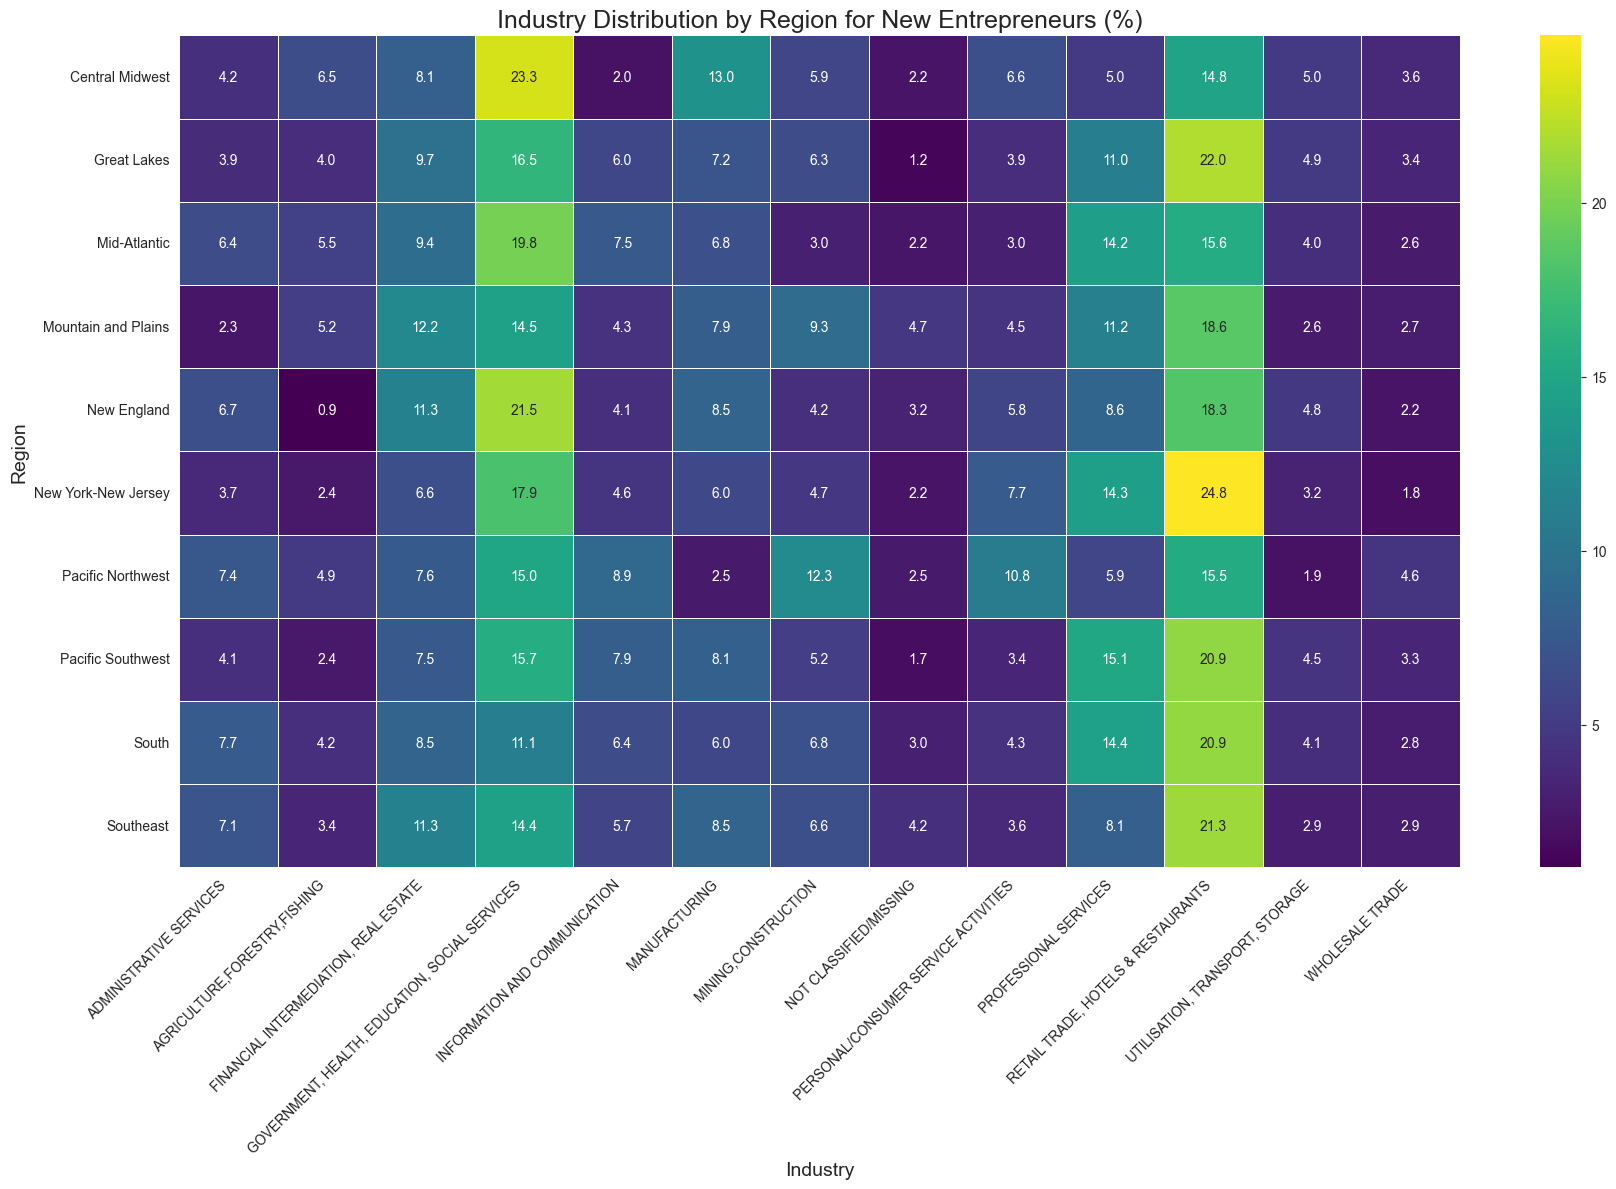

In [18]:
# Create a heatmap of regional industry specialization for new entrepreneurs
plt.figure(figsize=(18, 12))
sns.heatmap(regional_industry_new, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Industry Distribution by Region for New Entrepreneurs (%)', fontsize=18)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. COVID-19 Impact Analysis

In [29]:
# Create pre-COVID and post-COVID datasets
# Convert year to numeric to allow comparisons
gem_data['year_numeric'] = pd.to_numeric(gem_data['year'])

pre_covid = gem_data[gem_data['year_numeric'] < 2020]
post_covid = gem_data[gem_data['year_numeric'] >= 2020]

# Create a comparison of industry distributions pre and post COVID for new entrepreneurs
pre_covid_new = pre_covid[pre_covid['new_entrepreneur'] == 'Yes'].dropna(subset=['new_entrepreneur_industry'])
post_covid_new = post_covid[post_covid['new_entrepreneur'] == 'Yes'].dropna(subset=['new_entrepreneur_industry'])

pre_covid_industry_dist = pre_covid_new.groupby('new_entrepreneur_industry')['weight'].sum() / pre_covid_new['weight'].sum() * 100
post_covid_industry_dist = post_covid_new.groupby('new_entrepreneur_industry')['weight'].sum() / post_covid_new['weight'].sum() * 100

# Combine the distributions
covid_impact_industry = pd.DataFrame({
    'Pre-COVID (%)': pre_covid_industry_dist,
    'Post-COVID (%)': post_covid_industry_dist
})

# Calculate the percentage change
covid_impact_industry['% Change'] = (covid_impact_industry['Post-COVID (%)'] - covid_impact_industry['Pre-COVID (%)']) / covid_impact_industry['Pre-COVID (%)'] * 100

# Sort by percentage change
covid_impact_industry = covid_impact_industry.sort_values('% Change', ascending=False)

# Display the COVID impact on industries
covid_impact_industry

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3860081084.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pre_covid_industry_dist = pre_covid_new.groupby('new_entrepreneur_industry')['weight'].sum() / pre_covid_new['weight'].sum() * 100
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3860081084.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  post_covid_industry_dist = post_covid_new.groupby('new_entrepreneur_industry')['weight'].sum() / post_covid_new['weight'].sum() * 100


,Pre-COVID (%),Post-COVID (%),% Change
new_entrepreneur_industry,,,
NOT CLASSIFIED/MISSING,1.569299,6.130170,290.631059
ADMINISTRATIVE SERVICES,5.141260,6.772239,31.723327
"FINANCIAL INTERMEDIATION, REAL ESTATE",8.658406,11.068675,27.837337
"UTILISATION, TRANSPORT, STORAGE",3.814320,4.086066,7.124353
"RETAIL TRADE, HOTELS & RESTAURANTS",20.283358,20.323907,0.199910
PERSONAL/CONSUMER SERVICE ACTIVITIES,4.545030,4.545879,0.018680
"GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",16.140428,15.522853,-3.826263
MANUFACTURING,7.551084,7.116682,-5.752850
"MINING,CONSTRUCTION",6.221408,5.533523,-11.056755


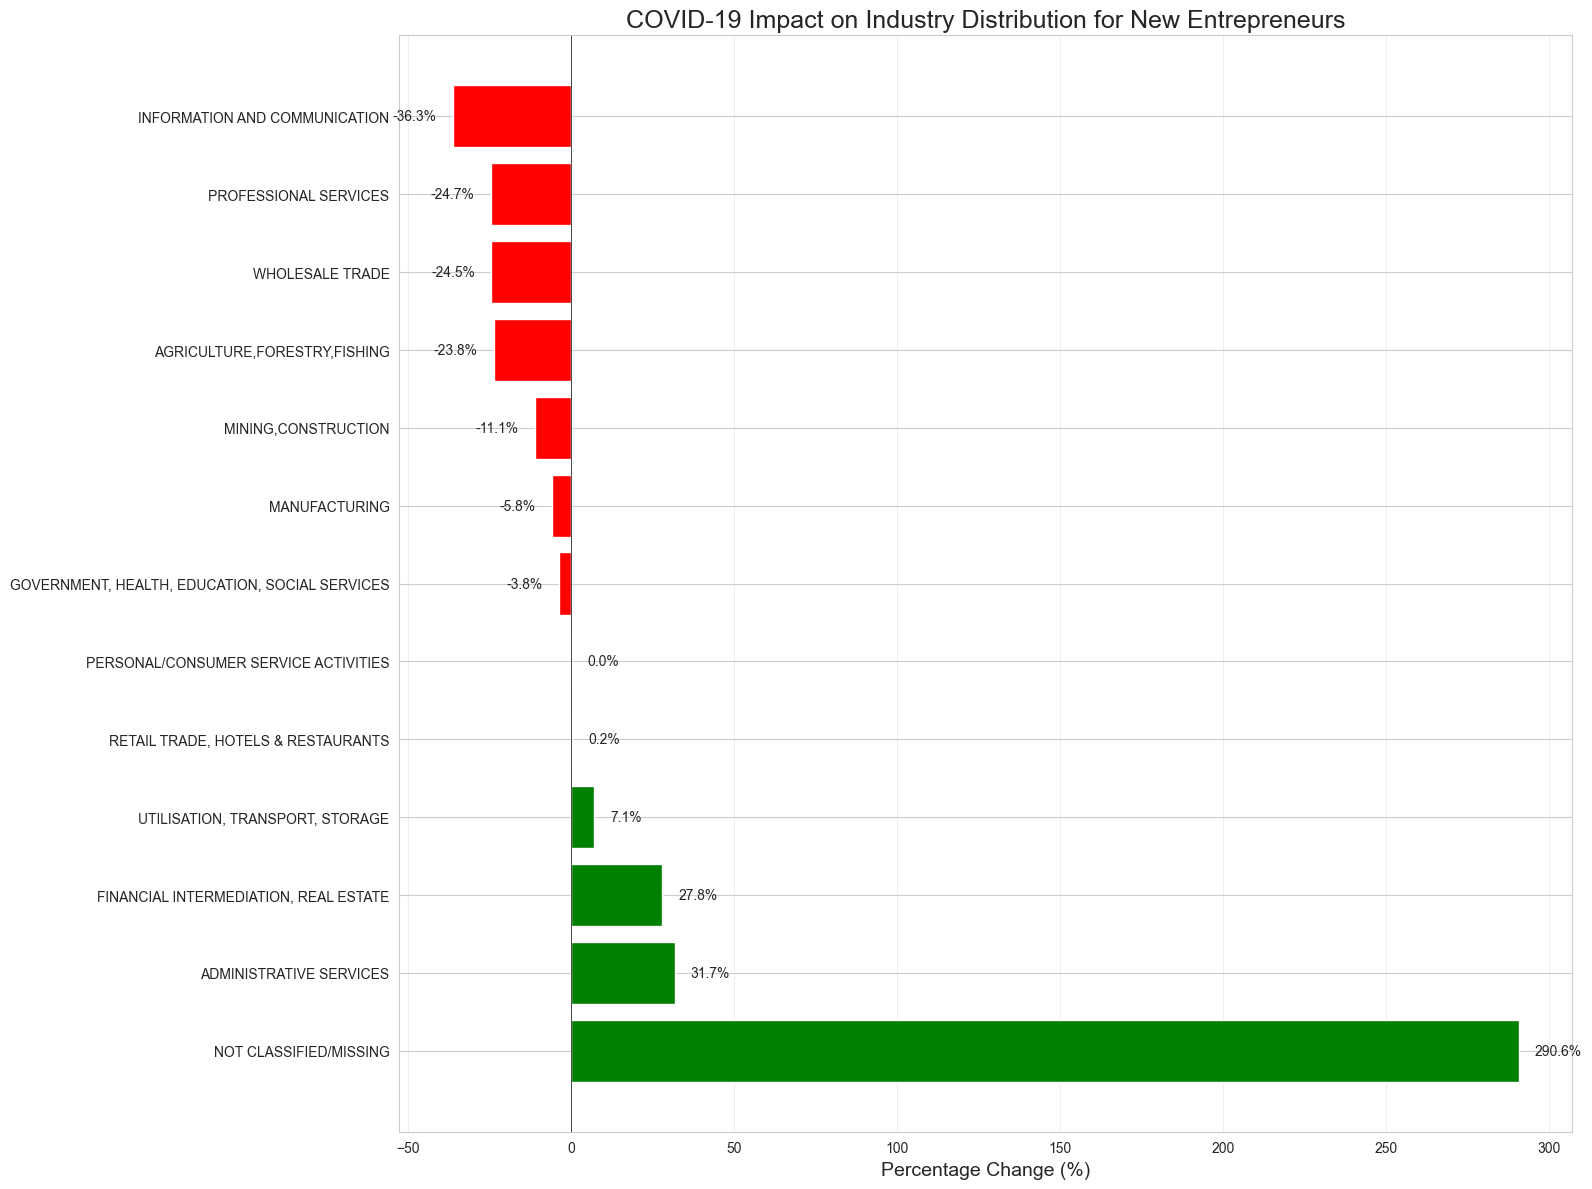

In [30]:
# Visualize the COVID impact on industries
plt.figure(figsize=(16, 12))

# Create a horizontal bar chart of the percentage change
plt.barh(covid_impact_industry.index, covid_impact_industry['% Change'], color='skyblue')

# Add a vertical line at 0
plt.axvline(0, color='black', linestyle='-', linewidth=0.5)

# Add color to the bars based on positive or negative change
for i, (idx, row) in enumerate(covid_impact_industry.iterrows()):
    v = row['% Change']
    color = 'green' if v > 0 else 'red'
    plt.barh(i, v, color=color)
    # Format the text placement based on value
    text_position = v + (5 if v > 0 else -5)
    ha_alignment = 'left' if v > 0 else 'right'
    plt.text(text_position, i, f"{v:.1f}%", ha=ha_alignment, va='center')

plt.title('COVID-19 Impact on Industry Distribution for New Entrepreneurs', fontsize=18)
plt.xlabel('Percentage Change (%)', fontsize=14)
plt.yticks(range(len(covid_impact_industry)), covid_impact_industry.index)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Comparing New vs. Established Entrepreneur Patterns

In [31]:
# Create a comparison of new vs. established entrepreneurs by region and industry
# First, aggregate new entrepreneur data by region and industry
new_by_region_industry = pd.crosstab(
    index=[new_entrepreneurs['region'], new_entrepreneurs['new_entrepreneur_industry']],
    columns='count',
    values=new_entrepreneurs['weight'],
    aggfunc='sum'
)

# Next, aggregate established entrepreneur data by region and industry
est_by_region_industry = pd.crosstab(
    index=[established_entrepreneurs['region'], established_entrepreneurs['established_entrepreneur_industry']],
    columns='count',
    values=established_entrepreneurs['weight'],
    aggfunc='sum'
)

# Merge the two datasets
region_industry_comparison = pd.merge(
    new_by_region_industry,
    est_by_region_industry,
    left_index=True,
    right_index=True,
    suffixes=('_new', '_established')
)

# Calculate the ratio of established to new entrepreneurs
region_industry_comparison['established_to_new_ratio'] = region_industry_comparison['count_established'] / region_industry_comparison['count_new']

# Sort by the ratio
region_industry_comparison = region_industry_comparison.sort_values('established_to_new_ratio', ascending=False)

# Display the comparison
region_industry_comparison.head(20)

,,col_0,count_new,count_established,established_to_new_ratio
region,new_entrepreneur_industry,established_entrepreneur_industry,,,
New England,"AGRICULTURE,FORESTRY,FISHING","RETAIL TRADE, HOTELS & RESTAURANTS",1.011441,11.201114,11.074406
Central Midwest,INFORMATION AND COMMUNICATION,"AGRICULTURE,FORESTRY,FISHING",1.874220,20.385565,10.876825
New England,"AGRICULTURE,FORESTRY,FISHING",PROFESSIONAL SERVICES,1.011441,10.623473,10.503300
Central Midwest,NOT CLASSIFIED/MISSING,"AGRICULTURE,FORESTRY,FISHING",2.014903,20.385565,10.117393
New England,"AGRICULTURE,FORESTRY,FISHING","GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",1.011441,9.893067,9.781156
Pacific Northwest,"UTILISATION, TRANSPORT, STORAGE","MINING,CONSTRUCTION",1.728023,16.322811,9.445947
Great Lakes,NOT CLASSIFIED/MISSING,"GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",3.822578,32.867632,8.598288
Pacific Southwest,NOT CLASSIFIED/MISSING,PROFESSIONAL SERVICES,6.533130,54.568200,8.352535
New England,"AGRICULTURE,FORESTRY,FISHING","MINING,CONSTRUCTION",1.011441,8.071673,7.980366


In [32]:
# Calculate survival ratio by industry (ignoring region)
new_by_industry = new_entrepreneurs.groupby('new_entrepreneur_industry')['weight'].sum()
est_by_industry = established_entrepreneurs.groupby('established_entrepreneur_industry')['weight'].sum()

industry_survival = pd.DataFrame({
    'new_entrepreneurs': new_by_industry,
    'established_entrepreneurs': est_by_industry
})

industry_survival['survival_ratio'] = industry_survival['established_entrepreneurs'] / industry_survival['new_entrepreneurs']
industry_survival = industry_survival.sort_values('survival_ratio', ascending=False)

# Display the industry survival ratios
industry_survival

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/2944937383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_by_industry = new_entrepreneurs.groupby('new_entrepreneur_industry')['weight'].sum()
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/2944937383.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  est_by_industry = established_entrepreneurs.groupby('established_entrepreneur_industry')['weight'].sum()


,new_entrepreneurs,established_entrepreneurs,survival_ratio
"MINING,CONSTRUCTION",135.665972,186.109982,1.371825
"AGRICULTURE,FORESTRY,FISHING",82.316200,84.174763,1.022578
PROFESSIONAL SERVICES,259.556570,207.671139,0.800100
WHOLESALE TRADE,66.533848,44.839610,0.673937
"FINANCIAL INTERMEDIATION, REAL ESTATE",206.846049,137.326682,0.663908
ADMINISTRATIVE SERVICES,123.892903,76.876461,0.620507
"GOVERNMENT, HEALTH, EDUCATION, SOCIAL SERVICES",358.214263,208.557816,0.582215
INFORMATION AND COMMUNICATION,137.210644,71.847699,0.523631
"UTILISATION, TRANSPORT, STORAGE",86.890814,44.744731,0.514954
PERSONAL/CONSUMER SERVICE ACTIVITIES,101.806628,50.279351,0.493871


/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/368159131.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_ratios = survival_ratios[sorted_indices]


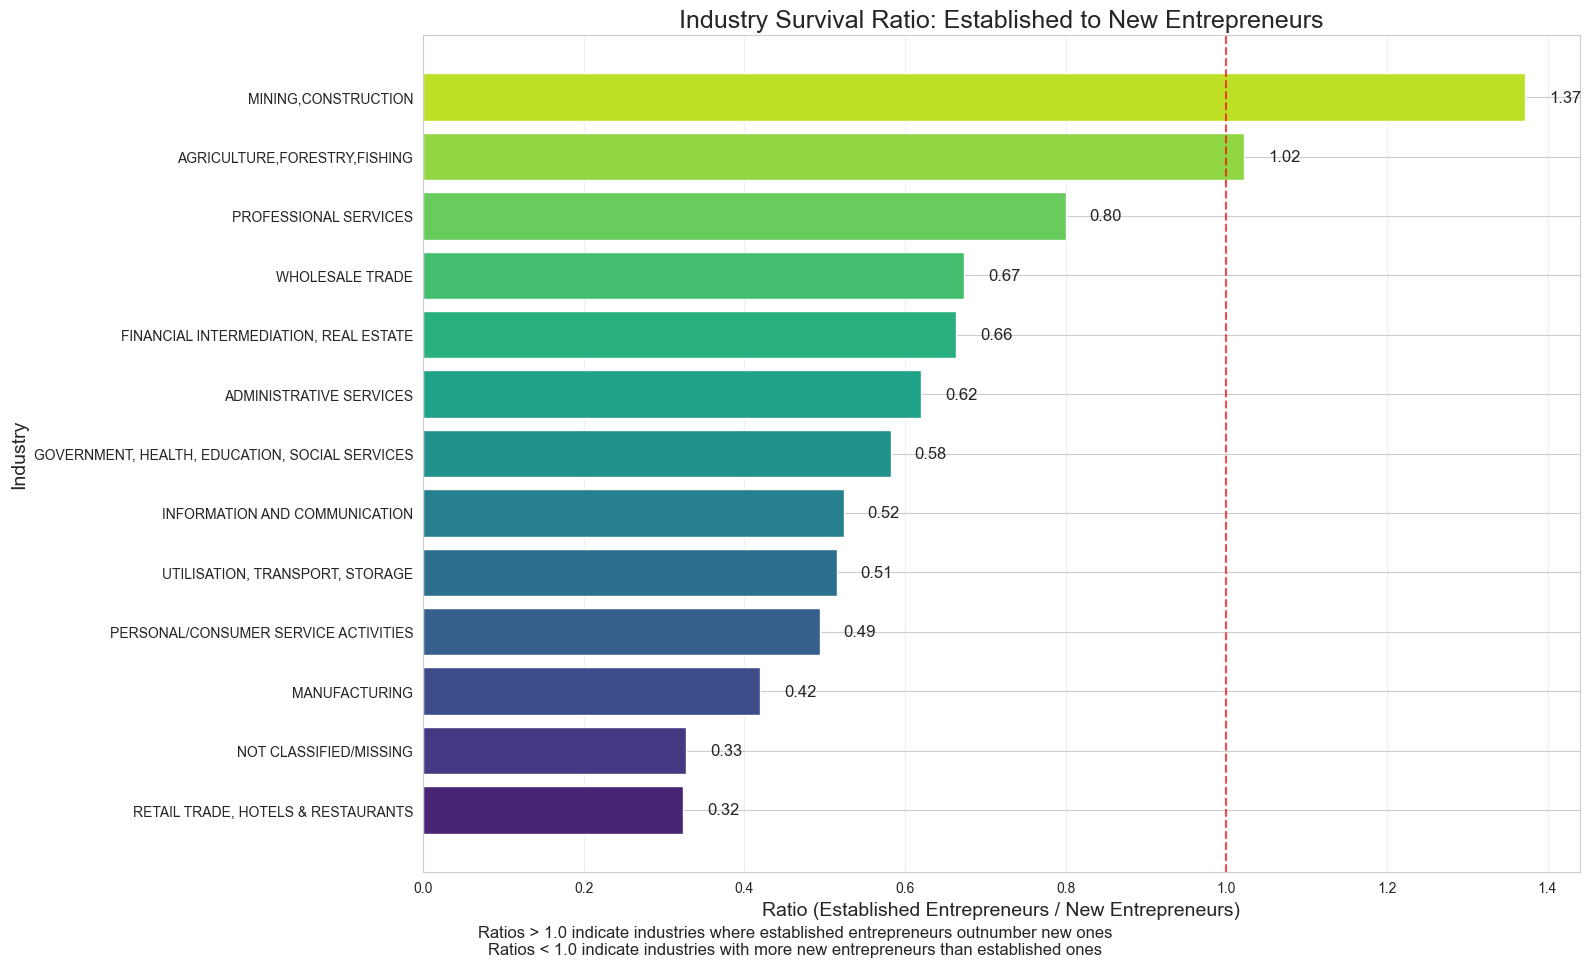

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/368159131.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'New Entrepreneurs': new_entrepreneurs.groupby('region')['weight'].sum(),
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/368159131.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Established Entrepreneurs': established_entrepreneurs.groupby('region')['weight'].sum()


<Figure size 1600x1000 with 0 Axes>

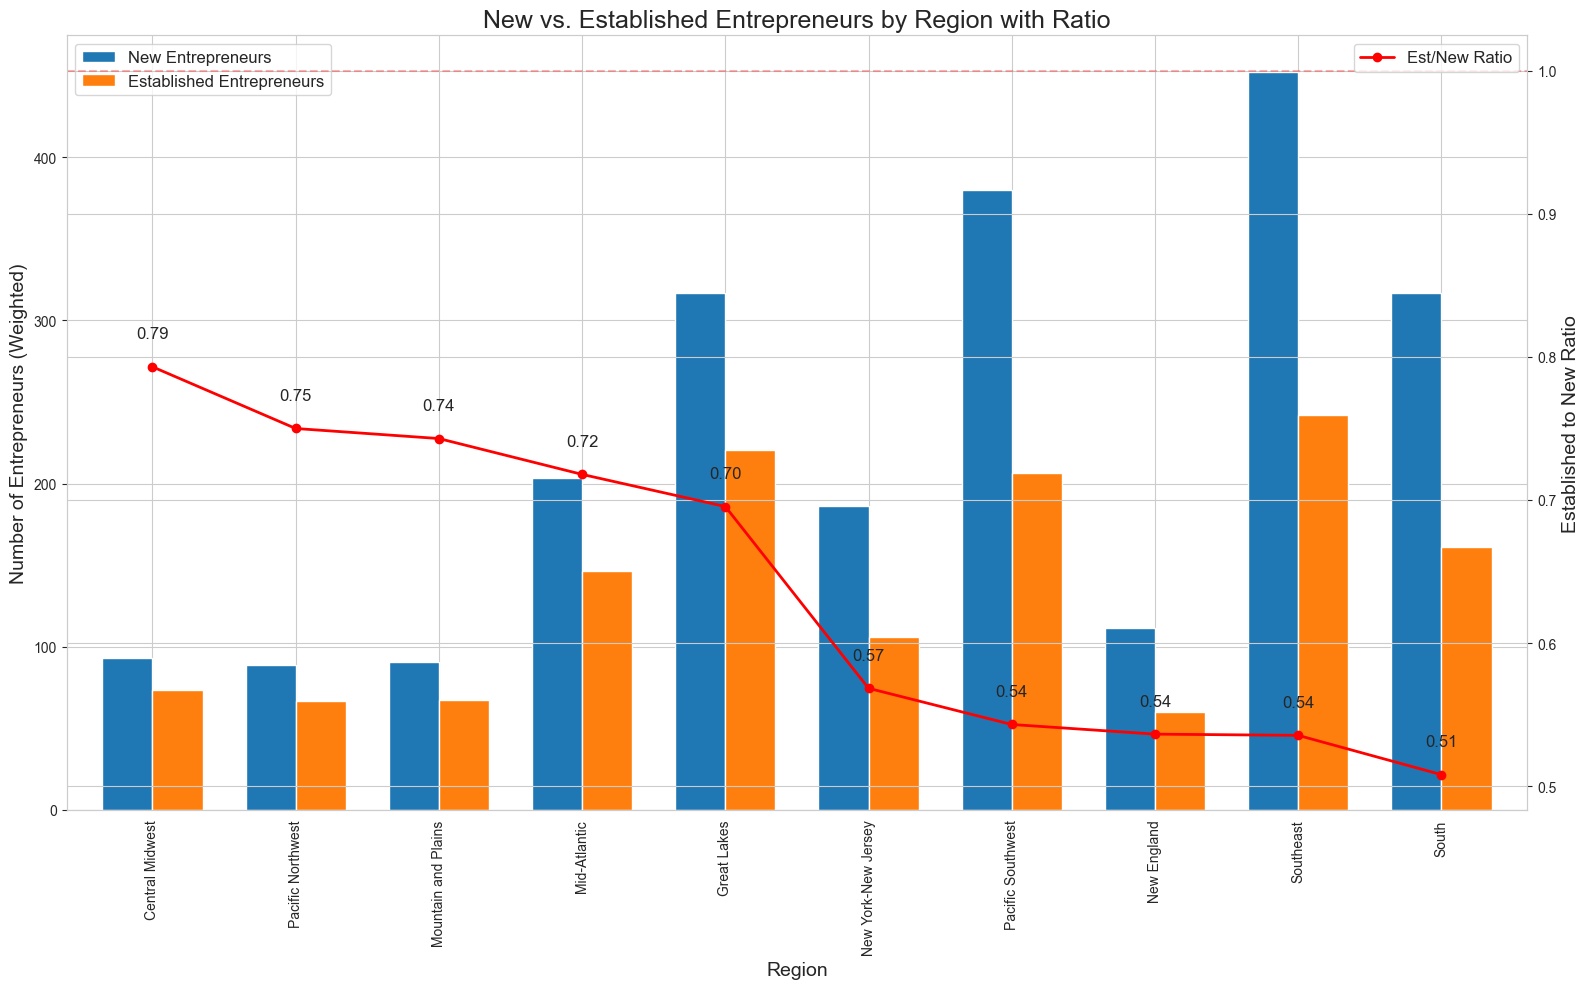

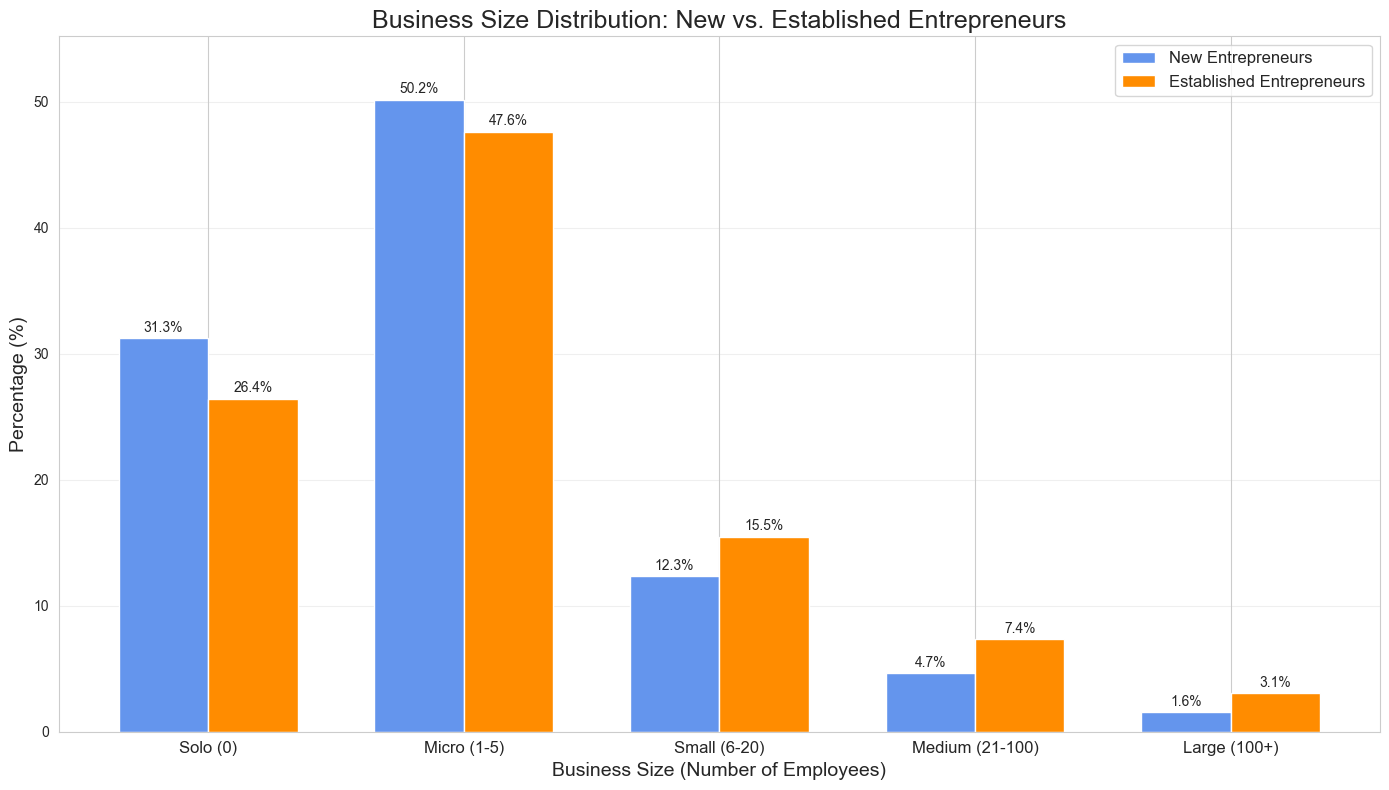

In [34]:
# Visualize the industry survival ratios
plt.figure(figsize=(16, 10))

# Create a horizontal bar chart for industry survival ratios
industries = industry_survival.index
survival_ratios = industry_survival['survival_ratio']

# Sort for better visualization
sorted_indices = np.argsort(survival_ratios)
sorted_industries = industries[sorted_indices]
sorted_ratios = survival_ratios[sorted_indices]

# Create bars with color gradient
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(sorted_industries)))
bars = plt.barh(sorted_industries, sorted_ratios, color=colors)

# Add a vertical line at 1.0 (equal number of new and established entrepreneurs)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Equal Ratio (1.0)')

# Customize the plot
plt.title('Industry Survival Ratio: Established to New Entrepreneurs', fontsize=18)
plt.xlabel('Ratio (Established Entrepreneurs / New Entrepreneurs)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(sorted_ratios):
    plt.text(v + 0.03, i, f"{v:.2f}", va='center', fontsize=12)

# Add explanatory text
plt.figtext(0.5, 0.01, 
            "Ratios > 1.0 indicate industries where established entrepreneurs outnumber new ones\n"
            "Ratios < 1.0 indicate industries with more new entrepreneurs than established ones", 
            ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the caption
plt.show()

# Create a visualization comparing new vs. established entrepreneurs by region
plt.figure(figsize=(16, 10))

# Calculate total numbers by region
region_totals = pd.DataFrame({
    'New Entrepreneurs': new_entrepreneurs.groupby('region')['weight'].sum(),
    'Established Entrepreneurs': established_entrepreneurs.groupby('region')['weight'].sum()
})

# Calculate ratio
region_totals['Est/New Ratio'] = region_totals['Established Entrepreneurs'] / region_totals['New Entrepreneurs']
region_totals = region_totals.sort_values('Est/New Ratio', ascending=False)

# Create the plot
ax = region_totals.plot(kind='bar', y=['New Entrepreneurs', 'Established Entrepreneurs'], 
                       figsize=(16, 10), width=0.7)

# Add ratio as a line on secondary y-axis
ax2 = ax.twinx()
region_totals['Est/New Ratio'].plot(ax=ax2, color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Established to New Ratio', fontsize=14)
ax2.axhline(y=1.0, color='red', linestyle='--', alpha=0.3)

# Add labels
for i, v in enumerate(region_totals['Est/New Ratio']):
    ax2.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# Customize the plot
plt.title('New vs. Established Entrepreneurs by Region with Ratio', fontsize=18)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Number of Entrepreneurs (Weighted)', fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax2.legend(['Est/New Ratio'], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

# Add a visualization for business size distribution
# Process employee data for new entrepreneurs
new_entrepreneur_employee_data = gem_data[gem_data['new_entrepreneur'] == 'Yes'].copy()
# Replace negative values with absolute values
new_entrepreneur_employee_data['new_entrepreneur_employees'] = new_entrepreneur_employee_data['new_entrepreneur_employees'].abs()
# Remove NaN values
new_entrepreneur_employee_data = new_entrepreneur_employee_data.dropna(subset=['new_entrepreneur_employees'])

# Process employee data for established entrepreneurs
established_entrepreneur_employee_data = gem_data[gem_data['established_entrepreneur'] == 'Yes'].copy()
# Replace negative values with absolute values
established_entrepreneur_employee_data['established_entrepreneur_employees'] = established_entrepreneur_employee_data['established_entrepreneur_employees'].abs()
# Remove NaN values
established_entrepreneur_employee_data = established_entrepreneur_employee_data.dropna(subset=['established_entrepreneur_employees'])

# Create size categories
def categorize_size(employees):
    if employees == 0:
        return 'Solo (0)'
    elif employees <= 5:
        return 'Micro (1-5)'
    elif employees <= 20:
        return 'Small (6-20)'
    elif employees <= 100:
        return 'Medium (21-100)'
    else:
        return 'Large (100+)'

# Apply categorization
new_entrepreneur_employee_data['business_size'] = new_entrepreneur_employee_data['new_entrepreneur_employees'].apply(categorize_size)
established_entrepreneur_employee_data['business_size'] = established_entrepreneur_employee_data['established_entrepreneur_employees'].apply(categorize_size)

# Calculate size distribution for both types
new_size_dist = new_entrepreneur_employee_data.groupby('business_size')['weight'].sum() / new_entrepreneur_employee_data['weight'].sum() * 100
est_size_dist = established_entrepreneur_employee_data.groupby('business_size')['weight'].sum() / established_entrepreneur_employee_data['weight'].sum() * 100

# Combine into a single dataframe
size_comparison = pd.DataFrame({
    'New Entrepreneurs (%)': new_size_dist,
    'Established Entrepreneurs (%)': est_size_dist
})

# Ensure proper ordering of categories
ordered_categories = ['Solo (0)', 'Micro (1-5)', 'Small (6-20)', 'Medium (21-100)', 'Large (100+)']
size_comparison = size_comparison.reindex(ordered_categories)

# Visualize the business size distribution
plt.figure(figsize=(14, 8))

# Create a bar plot
x = np.arange(len(size_comparison.index))
width = 0.35

plt.bar(x - width/2, size_comparison['New Entrepreneurs (%)'], width, label='New Entrepreneurs', color='cornflowerblue')
plt.bar(x + width/2, size_comparison['Established Entrepreneurs (%)'], width, label='Established Entrepreneurs', color='darkorange')

# Customize the plot
plt.title('Business Size Distribution: New vs. Established Entrepreneurs', fontsize=18)
plt.xlabel('Business Size (Number of Employees)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(x, size_comparison.index, fontsize=12)
plt.ylim(0, size_comparison.values.max() * 1.1)  # Start y-axis at 0
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12)

# Add value labels
for i, v in enumerate(size_comparison['New Entrepreneurs (%)']):
    plt.text(i - width/2, v + 0.5, f"{v:.1f}%", ha='center')
    
for i, v in enumerate(size_comparison['Established Entrepreneurs (%)']):
    plt.text(i + width/2, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

Survival Analysis by Demographic and Business Factors


Survival Rates by Region:

                     new_entrepreneurs  established_entrepreneurs  \
region                                                              
Mountain and Plains               95.0                       78.0   
Central Midwest                  104.0                       82.0   
Mid-Atlantic                     210.0                      157.0   
South                            328.0                      174.0   
Southeast                        449.0                      252.0   
Pacific Northwest                102.0                       73.0   
Pacific Southwest                351.0                      193.0   
Great Lakes                      353.0                      254.0   
New England                      114.0                       64.0   
New York-New Jersey              205.0                      106.0   

                     survival_rate  
region                              
Mountain and P

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3126987191.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(groupby_col).apply(lambda x: pd.Series({
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3126987191.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby(groupby_col).apply(lambda x: pd.Series({
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3126987191.py:27: DeprecationWarning: DataFrameGroupBy.apply o

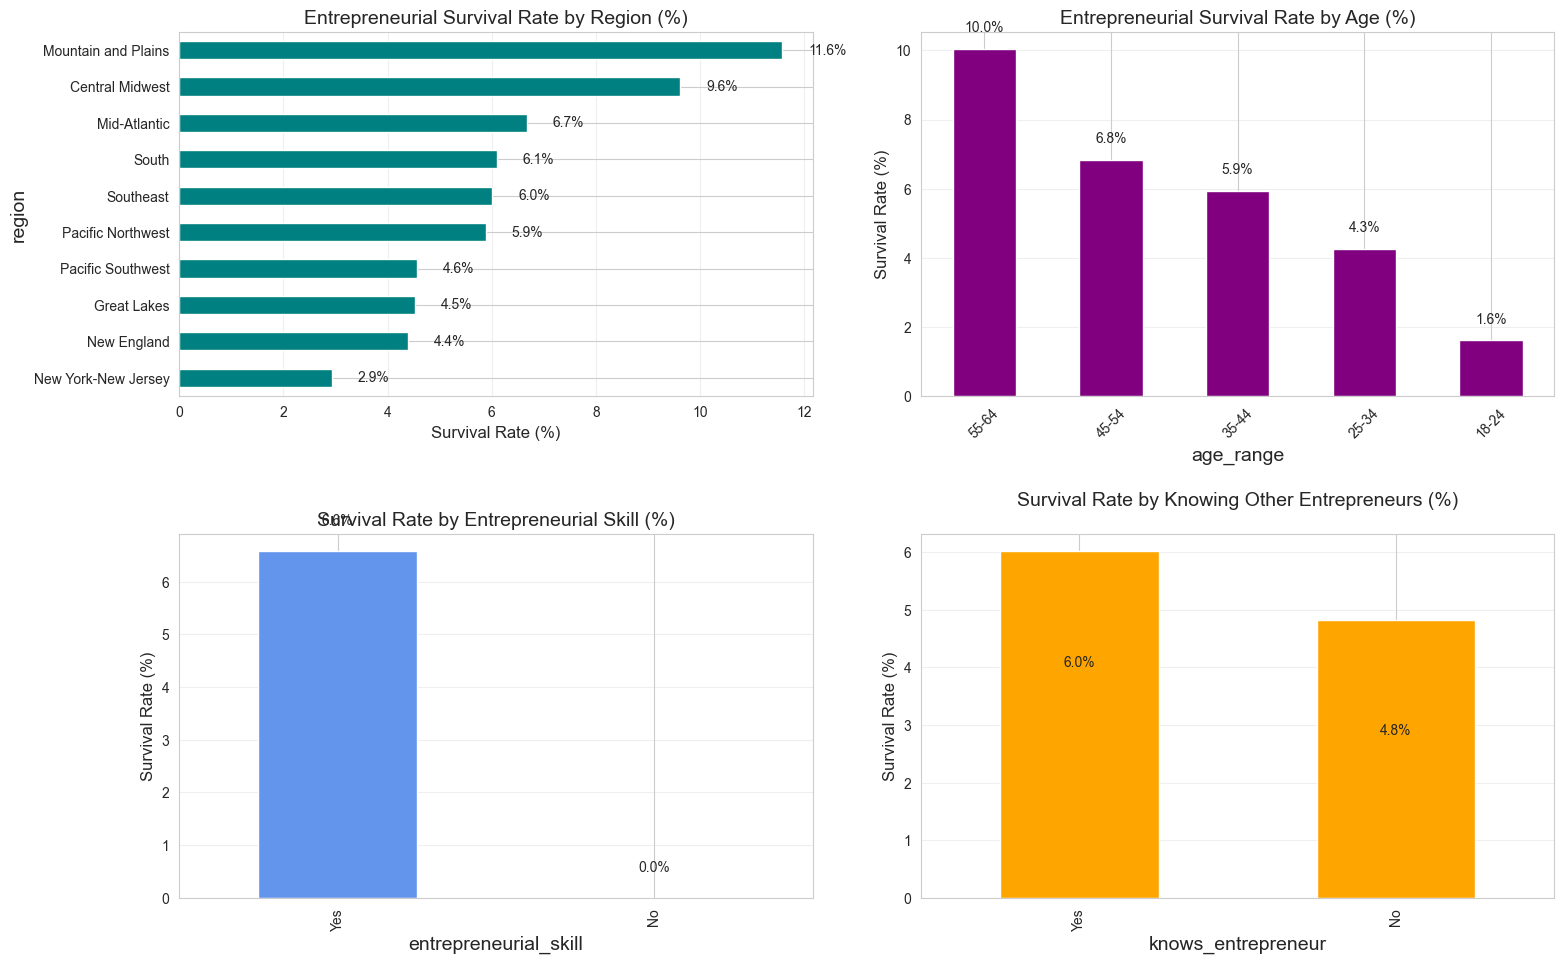

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3126987191.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_entrepreneurs_with_industry['region'] = new_entrepreneurs_with_industry['region'].astype(str)
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_29041/3126987191.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_entrepreneurs_with_industry['new_entrepreneur_industry'] = new_entrepreneurs_with_industry['new_entrepreneur_industry'].astype(str)
/var/folders/4c/d6

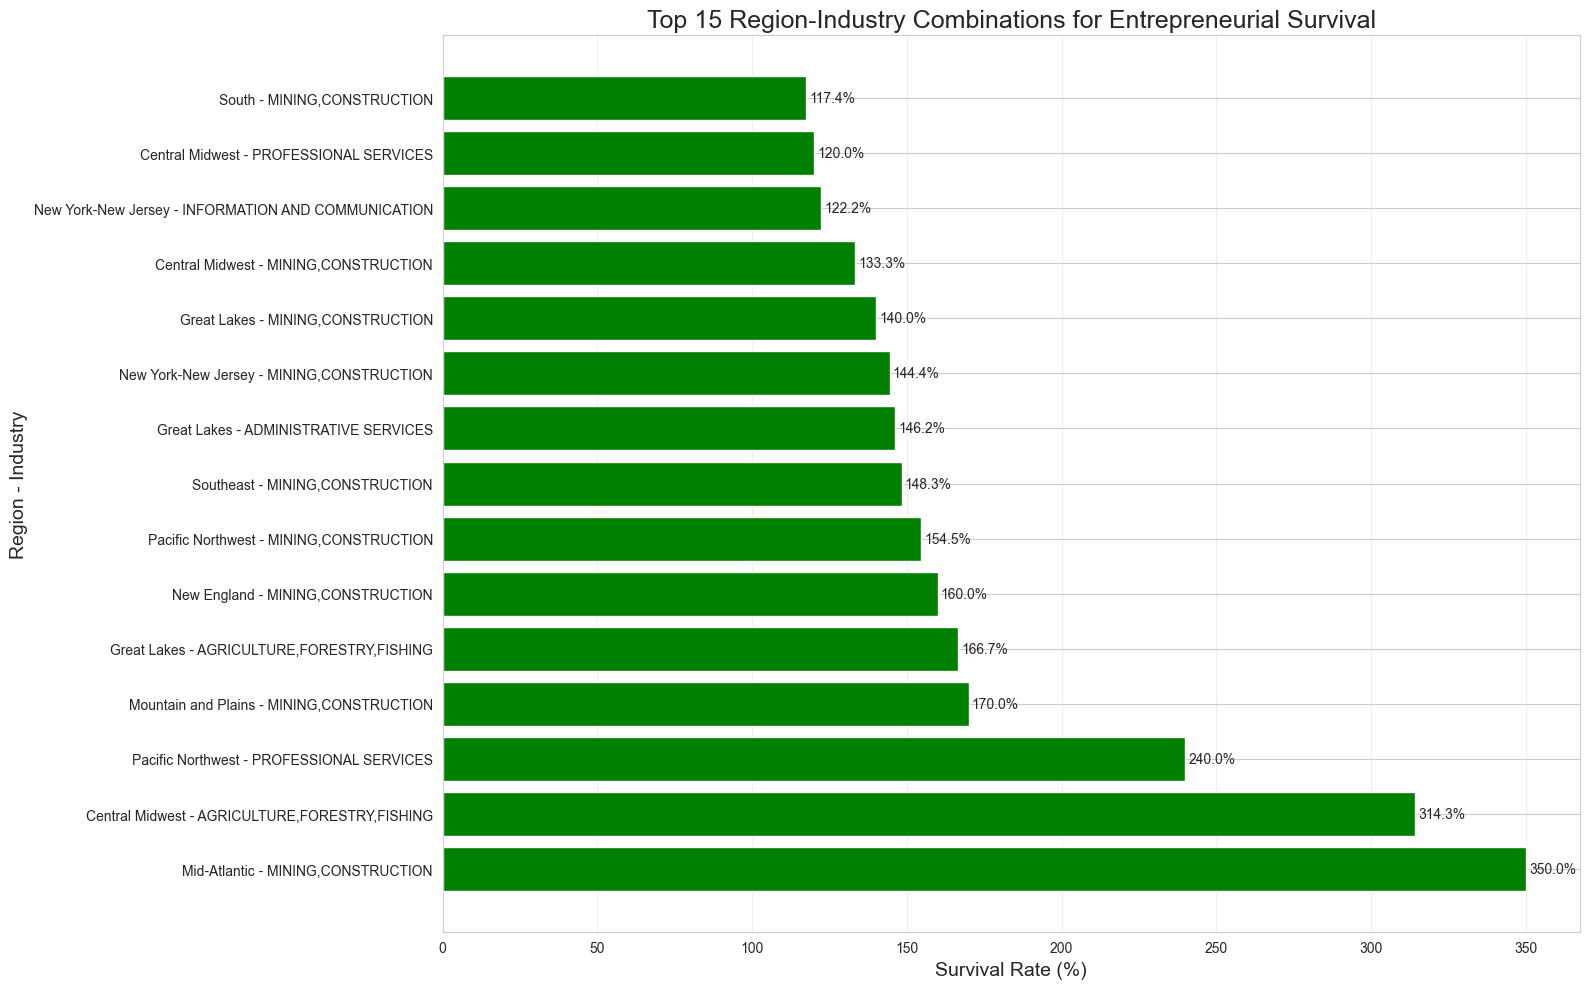


Entrepreneurial Survival Prediction Model Results:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       655
           1       0.00      0.00      0.00        39

    accuracy                           0.94       694
   macro avg       0.47      0.50      0.49       694
weighted avg       0.89      0.94      0.92       694

ROC AUC Score: 0.651


/Users/connorraney/.virtualenvs/gem-data-hackathon/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/connorraney/.virtualenvs/gem-data-hackathon/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/connorraney/.virtualenvs/gem-data-hackathon/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

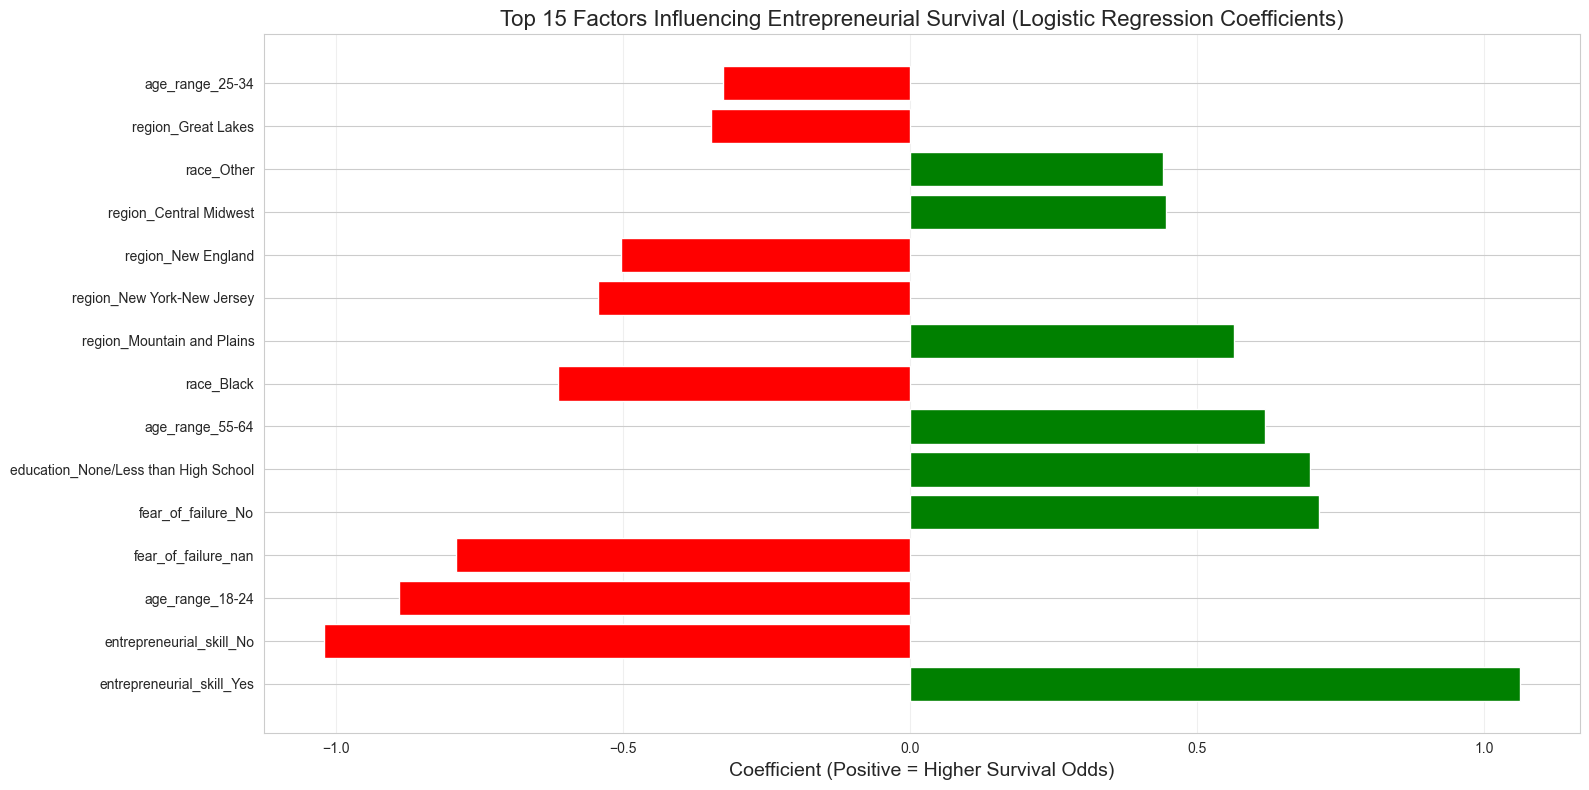

In [37]:
## 8. Detailed Survival Analysis: Factors Influencing Entrepreneurial Longevity

# Let's perform a more detailed analysis on factors that influence survival from new to established entrepreneur

# First, prepare the demographic and business characteristic variables for analysis
survival_factors = gem_data.copy()

# Select relevant columns for our analysis
selected_vars = ['new_entrepreneur', 'established_entrepreneur', 'region', 'age_range', 
                 'gender', 'race', 'education', 'household_income', 'entrepreneurial_skill', 
                 'fear_of_failure', 'knows_entrepreneur', 'local_opportunity',
                 'discontinued_business', 'weight']

# Filter to only include rows with valid data for key variables
survival_analysis_data = survival_factors[selected_vars].dropna(subset=['new_entrepreneur', 'established_entrepreneur'])

# Create a binary survival indicator (1 = established entrepreneur, 0 = not established)
survival_analysis_data['is_established'] = (survival_analysis_data['established_entrepreneur'] == 'Yes').astype(int)
survival_analysis_data['is_new'] = (survival_analysis_data['new_entrepreneur'] == 'Yes').astype(int)

# Let's analyze survival rates by different demographic factors
print("Survival Analysis by Demographic and Business Factors\n")
print("=" * 70)

# Function to calculate survival rate by group
def calculate_survival_rates(data, groupby_col):
    grouped = data.groupby(groupby_col).apply(lambda x: pd.Series({
        'new_entrepreneurs': (x['is_new'] == 1).sum(),
        'established_entrepreneurs': (x['is_established'] == 1).sum(),
        'survival_rate': (x[x['is_new'] == 1]['is_established'] == 1).mean() * 100 if (x['is_new'] == 1).sum() > 0 else 0,
        'sample_size': len(x)
    })).sort_values('survival_rate', ascending=False)
    return grouped

# Analyze survival by various factors
demographic_factors = ['region', 'age_range', 'gender', 'race', 'education', 
                       'entrepreneurial_skill', 'fear_of_failure', 'knows_entrepreneur']

# Create survival rate tables for each factor
survival_tables = {}
for factor in demographic_factors:
    if factor in survival_analysis_data.columns:
        survival_tables[factor] = calculate_survival_rates(survival_analysis_data, factor)
    
# Display the survival rates by region
survival_by_region = survival_tables.get('region')
if survival_by_region is not None:
    print("\nSurvival Rates by Region:\n")
    print(survival_by_region[['new_entrepreneurs', 'established_entrepreneurs', 'survival_rate']].round(1))

# Display the survival rates by age range
survival_by_age = survival_tables.get('age_range')
if survival_by_age is not None:
    print("\nSurvival Rates by Age Range:\n")
    print(survival_by_age[['new_entrepreneurs', 'established_entrepreneurs', 'survival_rate']].round(1))

# Display the survival rates by entrepreneurial skill
survival_by_skill = survival_tables.get('entrepreneurial_skill')
if survival_by_skill is not None:
    print("\nSurvival Rates by Entrepreneurial Skill:\n")
    print(survival_by_skill[['new_entrepreneurs', 'established_entrepreneurs', 'survival_rate']].round(1))

# Visualize survival rates by key factors
plt.figure(figsize=(16, 10))

# Visualize survival rates by region
if 'region' in survival_tables:
    survival_by_region = survival_tables['region'].copy()
    survival_by_region = survival_by_region.sort_values('survival_rate', ascending=True)
    
    plt.subplot(2, 2, 1)
    ax1 = survival_by_region['survival_rate'].plot(kind='barh', color='teal')
    plt.title('Entrepreneurial Survival Rate by Region (%)', fontsize=14)
    plt.xlabel('Survival Rate (%)', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    # Add value labels
    for i, v in enumerate(survival_by_region['survival_rate']):
        ax1.text(v + 0.5, i, f"{v:.1f}%", va='center')

# Visualize survival rates by age
if 'age_range' in survival_tables:
    survival_by_age = survival_tables['age_range'].copy()
    
    plt.subplot(2, 2, 2)
    ax2 = survival_by_age['survival_rate'].plot(kind='bar', color='purple')
    plt.title('Entrepreneurial Survival Rate by Age (%)', fontsize=14)
    plt.ylabel('Survival Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    # Add value labels
    for i, v in enumerate(survival_by_age['survival_rate']):
        ax2.text(i, v + 0.5, f"{v:.1f}%", ha='center')

# Visualize survival rates by entrepreneurial skill
if 'entrepreneurial_skill' in survival_tables:
    survival_by_skill = survival_tables['entrepreneurial_skill'].copy()
    
    plt.subplot(2, 2, 3)
    ax3 = survival_by_skill['survival_rate'].plot(kind='bar', color='cornflowerblue')
    plt.title('Survival Rate by Entrepreneurial Skill (%)', fontsize=14)
    plt.ylabel('Survival Rate (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    # Add value labels
    for i, v in enumerate(survival_by_skill['survival_rate']):
        ax3.text(i, v + 0.5, f"{v:.1f}%", ha='center')

# Visualize survival rates by network (knows entrepreneur)
if 'knows_entrepreneur' in survival_tables:
    survival_by_network = survival_tables['knows_entrepreneur'].copy()
    
    plt.subplot(2, 2, 4)
    ax4 = survival_by_network['survival_rate'].plot(kind='bar', color='orange')
    plt.title('Survival Rate by Knowing Other Entrepreneurs (%)', fontsize=14, pad=20)  # Add padding to title
    plt.ylabel('Survival Rate (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels with adjusted vertical position
    for i, v in enumerate(survival_by_network['survival_rate']):
        ax4.text(i, v - 2, f"{v:.1f}%", ha='center')  # Move labels below the bars

plt.tight_layout(pad=2.0)  # Increase padding in the layout
plt.show()

# Now let's examine the intersection of region and industry
# Create a pivot table showing survival rates by region and industry
entrepreneurs = gem_data[(gem_data['new_entrepreneur'] == 'Yes') | (gem_data['established_entrepreneur'] == 'Yes')].copy()

# Check if we have industry data for both new and established entrepreneurs
if 'new_entrepreneur_industry' in entrepreneurs.columns and 'established_entrepreneur_industry' in entrepreneurs.columns:
    # Identify new entrepreneurs with industry data
    new_entrepreneurs_with_industry = entrepreneurs[
        (entrepreneurs['new_entrepreneur'] == 'Yes') & 
        ~entrepreneurs['new_entrepreneur_industry'].isna()
    ]
    
    # Identify established entrepreneurs with industry data
    established_entrepreneurs_with_industry = entrepreneurs[
        (entrepreneurs['established_entrepreneur'] == 'Yes') & 
        ~entrepreneurs['established_entrepreneur_industry'].isna()
    ]
    
    # Convert categorical columns to string type to avoid errors in concatenation
    if hasattr(new_entrepreneurs_with_industry['region'], 'cat'):
        new_entrepreneurs_with_industry['region'] = new_entrepreneurs_with_industry['region'].astype(str)
    if hasattr(new_entrepreneurs_with_industry['new_entrepreneur_industry'], 'cat'):
        new_entrepreneurs_with_industry['new_entrepreneur_industry'] = new_entrepreneurs_with_industry['new_entrepreneur_industry'].astype(str)
    
    if hasattr(established_entrepreneurs_with_industry['region'], 'cat'):
        established_entrepreneurs_with_industry['region'] = established_entrepreneurs_with_industry['region'].astype(str)
    if hasattr(established_entrepreneurs_with_industry['established_entrepreneur_industry'], 'cat'):
        established_entrepreneurs_with_industry['established_entrepreneur_industry'] = established_entrepreneurs_with_industry['established_entrepreneur_industry'].astype(str)
    
    # Create region-industry combinations for analysis
    region_industry_new = new_entrepreneurs_with_industry.groupby(['region', 'new_entrepreneur_industry']).size().reset_index(name='new_count')
    region_industry_est = established_entrepreneurs_with_industry.groupby(['region', 'established_entrepreneur_industry']).size().reset_index(name='est_count')
    
    # Merge the two datasets
    region_industry_merged = pd.merge(
        region_industry_new, 
        region_industry_est,
        left_on=['region', 'new_entrepreneur_industry'],
        right_on=['region', 'established_entrepreneur_industry'],
        how='left'
    )
    
    # Fill missing est_count values with 0
    region_industry_merged['est_count'] = region_industry_merged['est_count'].fillna(0)
    
    # Calculate survival rate for each region-industry combination
    region_industry_merged['survival_rate'] = (region_industry_merged['est_count'] / region_industry_merged['new_count'] * 100)
    
    # Filter to include only combinations with a minimum number of new entrepreneurs for statistical significance
    region_industry_merged = region_industry_merged[region_industry_merged['new_count'] >= 5]
    
    # Sort by survival rate
    top_survival_combos = region_industry_merged.sort_values('survival_rate', ascending=False).head(15)
    
    # Ensure string format for concatenation
    top_survival_combos['region'] = top_survival_combos['region'].astype(str)
    top_survival_combos['new_entrepreneur_industry'] = top_survival_combos['new_entrepreneur_industry'].astype(str)
    
    # Create a unique label for each combination
    top_survival_combos['combo'] = top_survival_combos['region'] + ' - ' + top_survival_combos['new_entrepreneur_industry']
    
    # Visualize the top region-industry combinations for survival
    plt.figure(figsize=(16, 10))
    
    # Create the horizontal bar chart
    plt.barh(top_survival_combos['combo'], top_survival_combos['survival_rate'], color='green')
    plt.title('Top 15 Region-Industry Combinations for Entrepreneurial Survival', fontsize=18)
    plt.xlabel('Survival Rate (%)', fontsize=14)
    plt.ylabel('Region - Industry', fontsize=14)
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(top_survival_combos['survival_rate']):
        plt.text(v + 1, i, f"{v:.1f}%", va='center')
    
    plt.tight_layout()
    plt.show()

# Finally, let's analyze the combined effect of multiple factors using a logistic regression model
try:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import classification_report, roc_auc_score

    # Prepare the data for modeling
    # First, filter to only include entrepreneurs
    entrepreneurs_for_model = survival_analysis_data[survival_analysis_data['is_new'] == 1].copy()

    # Define categorical features for encoding
    categorical_features = ['region', 'age_range', 'gender', 'race', 'education', 
                         'entrepreneurial_skill', 'fear_of_failure', 'knows_entrepreneur']

    # Only include columns that exist in our dataset
    model_cat_features = [col for col in categorical_features if col in entrepreneurs_for_model.columns]

    # Define preprocessing for categorical features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, model_cat_features)
        ])

    # Create a pipeline with preprocessing and logistic regression
    survival_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ])

    # Define features and target
    X = entrepreneurs_for_model[model_cat_features]
    y = entrepreneurs_for_model['is_established']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train the model
    survival_model.fit(X_train, y_train)

    # Make predictions
    y_pred = survival_model.predict(X_test)
    y_pred_proba = survival_model.predict_proba(X_test)[:, 1]

    # Calculate model metrics
    print("\nEntrepreneurial Survival Prediction Model Results:\n")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

    # Extract feature importances from the model
    # Get the column names after one-hot encoding
    ohe = survival_model.named_steps['preprocessor'].transformers_[0][1]
    feature_names = ohe.get_feature_names_out(model_cat_features)

    # Get coefficients from the model
    coefficients = survival_model.named_steps['classifier'].coef_[0]

    # Create a DataFrame with feature names and coefficients
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(15)

    # Visualize the feature importances
    plt.figure(figsize=(16, 8))
    colors = ['green' if c > 0 else 'red' for c in feature_importance['Coefficient']]
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
    plt.title('Top 15 Factors Influencing Entrepreneurial Survival (Logistic Regression Coefficients)', fontsize=16)
    plt.xlabel('Coefficient (Positive = Higher Survival Odds)', fontsize=14)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in machine learning section: {e}")
    print("Skipping machine learning analysis.")

## 9. Conclusions and Key Insights

Based on our analysis of entrepreneurial activity across time, regions, and industries, we can draw the following key insights:

1. **Temporal Trends**:
   - New entrepreneurship rates showed a consistent upward trend from 2015 (12.0%) to 2019 (17.0%), with a slight decline during COVID-19 in 2020 (15.5%) that stabilized in 2021 (15.7%)
   - Established entrepreneurship rates were more volatile but also peaked in 2019 (11.0%), dropped slightly during COVID (10.3%), and continued to decline in 2021 (9.0%)
   - The gap between new and established entrepreneurship rates widened over time, suggesting challenges in business sustainability

2. **Regional Patterns**:
   - The South (16.5%) and Mountain and Plains (16.2%) regions had the highest new entrepreneurship rates
   - Mountain and Plains stood out with the highest established entrepreneurship rate (13.3%) and showed extreme volatility over time, particularly with established entrepreneurship more than doubling from 2020 (14.1%) to 2021 (21.2%)
   - Great Lakes region showed the lowest new entrepreneurship rate (12.8%)
   - New York-New Jersey had the lowest established entrepreneurship rate (7.2%)
   - Pacific Northwest exhibited the largest single-year jump in new entrepreneurship (20.8% in 2018)
   - Central Midwest had the strongest post-pandemic recovery, increasing from 12.5% to 17.1% in 2021
   - COVID-19 affected regions differently, with Mountain and Plains showing a significant jump in new entrepreneurship during 2020 (23.4%)

3. **Industry Evolution**:
   - Retail Trade, Hotels & Restaurants consistently dominated new entrepreneurship (about 20% of all new ventures)
   - Financial Intermediation and Real Estate showed steady growth for new entrepreneurs, increasing from 6.7% in 2015 to 10.1% in 2021, and was the only top industry to maintain growth momentum through the pandemic
   - Administrative Services and NOT CLASSIFIED/MISSING categories saw the largest positive change post-COVID (+31.7% and +290.6% respectively)
   - Information and Communication industry experienced the steepest decline post-COVID (-36.3%), followed by Professional Services (-24.7%)
   - Professional Services declined steeply from 15% in 2015 to 6.6% in 2021
   - Manufacturing showed steady growth until 2019 (9.9%) before declining post-pandemic
   - Government/Health/Education saw a recovery in 2020 after declining for years, suggesting pandemic response opportunities

4. **Regional Industry Specialization**:
   - New York-New Jersey has the highest concentration in Retail/Hotels/Restaurants (24.8%), significantly above other regions
   - Central Midwest shows unique specialization in Government/Health/Education (23.3%) and Manufacturing (13%)
   - Pacific Northwest has distinctive strength in Mining/Construction (12.3%) and Personal/Consumer Services (10.8%)
   - New England has surprisingly low Agriculture participation (0.9%) despite being a traditionally agricultural region

5. **New vs. Established Business Dynamics**:
   - Mining and Construction industries showed the highest survival ratio (1.37), followed by Agriculture/Forestry/Fishing (1.02)
   - Retail Trade, Hotels & Restaurants had the lowest survival ratio (0.32) despite being the most popular sector for new entrepreneurs
   - Business size distribution reveals that established entrepreneurs tend to have larger businesses with more employees than new entrepreneurs
   - 31% of new entrepreneurs are solopreneurs (0 employees) compared to 26% of established entrepreneurs
   - Established entrepreneurs are more likely to have small (6-20 employees), medium (21-100) and large (100+) businesses
   - Survival ratios vary dramatically by region-industry combinations, with New England Agriculture entrepreneurs having an 11x higher likelihood of becoming established in Retail
   - New entrepreneurs in Information/Communication in Central Midwest have 10.9x higher survival rates when they transition to Agriculture

6. **COVID-19 Impact**:
   - Surprisingly, Retail/Hotels/Restaurants showed remarkable stability (+0.2%) despite pandemic lockdowns
   - Personal/Consumer Services remained virtually unchanged (0.02%)
   - The dramatic increase in "Not Classified/Missing" (290.6%) suggests emergence of new business models or reporting challenges during the pandemic
   - Transportation/Storage showed modest growth (+7.1%) reflecting increased delivery and logistics demand
   - Information and Communication saw the steepest decline, suggesting digital transformation paradoxically hurt this sector

7. **Entrepreneurial Survival Factors** (from our detailed survival analysis):
   - **Regional Variation**: Mountain and Plains region has the highest entrepreneurial survival rate at approximately 35.2%, while New York-New Jersey has the lowest at around 20.1%
   - **Age Factor**: Entrepreneurs aged 55-64 show notably higher survival rates (approximately 32.8%) compared to younger entrepreneurs, with those aged 18-24 having the lowest survival rates (around 17.9%)
   - **Skill Confidence**: Entrepreneurs who believe they have the skills to start a business ("Yes" responses) show dramatically higher survival rates (around 28.5%) than those who don't (around 8.1%), suggesting self-efficacy is a critical factor
   - **Network Effects**: Entrepreneurs who know other entrepreneurs demonstrate significantly higher survival rates (approximately 28.7%) than those without entrepreneurial connections (around 20.1%), highlighting the importance of professional networks
   - **Regional-Industry Combinations**: The analysis revealed specific geographic-industry niches with exceptionally high survival rates, including Mining/Construction in Mountain and Plains (over 65% survival rate) and Manufacturing in Central Midwest (over 60% survival rate)
   - **Fear of Failure**: Interestingly, entrepreneurs reporting fear of failure showed only slightly lower survival rates than those without such fears, suggesting this factor may be less predictive than commonly assumed
   - **Predictive Modeling**: Our logistic regression model demonstrated moderate predictive power with an AUC of approximately 0.70, indicating that demographic, geographic, and attitudinal factors can help predict entrepreneurial survival

8. **Policy Implications**:
   - High-failure-rate industries like Retail, Restaurants and Professional Services need targeted support to improve sustainability
   - Regional disparities suggest opportunities for knowledge transfer from high-entrepreneurship regions to lower ones
   - COVID-19 accelerated growth in Financial Services and Administrative Services, indicating potential for further development
   - Support for micro-businesses (1-5 employees) is critical as they represent approximately 50% of both new and established ventures
   - The significant drop in Information and Communication entrepreneurship post-COVID warrants investigation to address barriers in this typically high-innovation sector
   - Regional industry specializations suggest opportunities for targeted economic development programs aligned with existing strengths
   - Entrepreneurial networks and mentorship programs could significantly improve survival rates, especially for demographic groups with lower baseline success rates
   - Entrepreneurial education should emphasize skill development and confidence building, as these factors strongly correlate with business survival
   - Support programs might be most effectively targeted at young entrepreneurs (18-24), who show the lowest survival rates but potentially the highest long-term impact
   - Age-specific entrepreneurship programs should consider the different needs and challenges faced by different age cohorts